In [1]:
# This section should only be run if you don't have files for monthly averages for all oceanographic variables
# DJF: This section creates a monthly climatology of all the dataset file
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import os
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

clim = 5
csv_file_path = "C:/Users/df391/OneDrive - University of Exeter/Post_Doc_Ocean_Health/HeatwaveAnalysis/PARAMETERS_0.csv"
parameters_df = pd.read_csv(csv_file_path)
# Remove extra spaces from column names

parameters_df.columns = parameters_df.columns.str.strip()
climate_year = np.floor((np.array(parameters_df['start_year'].values) + np.array(parameters_df['end_year'].values))/2)
uni = np.unique(climate_year)

# Open the NetCDF file
#ds = xr.open_dataset('D:/OceanHealth/OceanSODA-ETHZ_GRaCER_v2021a_1982-2020.nc') #DJF: Edited file location 16/05/2024
ds = xr.open_dataset('E:/OceanHealth/UExP-FNN-U_GCB2024.nc')
#Setup of time array from OceanSODA file...
ref = datetime.datetime(1970,1,15)
time = ds['time'].values

#Convert time from 'days since' to a datetime object, so we can then get the year
time = np.array(time.astype('datetime64[Y]').astype(int) + 1970)
print(time)
# List of variables
# variables = ['dic','fco2','flux','pH','ta','saturation_aragonite','subskin_temp','skin_temp','ERA5_ws','CCMP_ws','OC-CCI_chlor_a']
variables = ['flux','fco2','ERA5_ws','subskin_temp','OC-CCI_chlor_a']
for i in uni:
    print(i)
    output_path = 'E:/OceanHealth/all_variables_monthly_avg_' + str(int(i))+'_GCB.nc' # DJF: Edited output path 16/05/2024
    if not os.path.exists(output_path):
        print(f'Climatology doesnt exist, generating for year: {i}')
        # Create an empty dataset to store the monthly averages for all variables
        monthly_avg_dataset = xr.Dataset()
        f = np.where((time >= i-clim) & (time <= i+clim))[0]
        #print(f)
        # Loop over each variable
        for variable in variables:
            # Extract the variable
            var_data2 = ds[variable][:,:,f].transpose('time','latitude','longitude')
            var_data = np.array(var_data2)
            ###
            #Trend calculation
            ###
            #Setup a latitude/longitude grid coincident to var_data.
            trend = np.zeros((var_data.shape[1],var_data.shape[2])); trend[:] = np.nan
            for j_lat in range(var_data.shape[1]):
                print(j_lat)
                for j_lon in range(var_data.shape[2]):
                    temp_data = var_data[:,j_lat,j_lon]
                    if np.sum(np.isnan(temp_data))==0:
                        fit = STL(temp_data,period=12,robust=True).fit()
                        m, b = np.polyfit(range(len(temp_data)), fit.trend, 1)
                        trend[j_lat,j_lon] = m
                        # plt.figure()
                        # plt.plot(temp_data)
                        # plt.plot(fit.trend)
                        # plt.plot(fit.seasonal)
                        # plt.plot(np.arange(0,len(temp_data))*m + b)
                        # plt.show()
            # plt.figure()
            # plt.pcolor(trend)
            # plt.colorbar()
            # plt.show()
            
            #var_data = var_data[f,:,:]
        
            # Resample to monthly frequency and calculate the mean for each month
            monthly_avg = var_data2.resample(time='M').mean(dim='time')
        
            # Calculate the overall average for each month across all years
            monthly_avg_overall = monthly_avg.groupby('time.month').mean(dim='time')
        
            # Add the variable to the combined dataset
            monthly_avg_dataset[variable] = monthly_avg_overall
            monthly_avg_dataset[variable+'_trend'] = (['lat', 'lon'],  trend)
        
        # Save the combined dataset to a new NetCDF file
        
        monthly_avg_dataset.to_netcdf(output_path)
        print(f'Saved all variables monthly averages to {output_path}')
        monthly_avg_dataset.close()

[1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 1986 1986
 1986 1986 1986 1986 1986 1986 1986 1986 1986 1986 1987 1987 1987 1987
 1987 1987 1987 1987 1987 1987 1987 1987 1988 1988 1988 1988 1988 1988
 1988 1988 1988 1988 1988 1988 1989 1989 1989 1989 1989 1989 1989 1989
 1989 1989 1989 1989 1990 1990 1990 1990 1990 1990 1990 1990 1990 1990
 1990 1990 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991 1991
 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1992 1993 1993
 1993 1993 1993 1993 1993 1993 1993 1993 1993 1993 1994 1994 1994 1994
 1994 1994 1994 1994 1994 1994 1994 1994 1995 1995 1995 1995 1995 1995
 1995 1995 1995 1995 1995 1995 1996 1996 1996 1996 1996 1996 1996 1996
 1996 1996 1996 1996 1997 1997 1997 1997 1997 1997 1997 1997 1997 1997
 1997 1997 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 1998
 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 2000 2000
 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2001 2001 2001 2001
 2001 

C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Saved all variables monthly averages to E:/OceanHealth/all_variables_monthly_avg_2006_GCB.nc
2011.0
Climatology doesnt exist, generating for year: 2011.0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Saved all variables monthly averages to E:/OceanHealth/all_variables_monthly_avg_2011_GCB.nc
2012.0
Climatology doesnt exist, generating for year: 2012.0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Saved all variables monthly averages to E:/OceanHealth/all_variables_monthly_avg_2012_GCB.nc
2015.0
Climatology doesnt exist, generating for year: 2015.0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Saved all variables monthly averages to E:/OceanHealth/all_variables_monthly_avg_2015_GCB.nc
2016.0
Climatology doesnt exist, generating for year: 2016.0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


Saved all variables monthly averages to E:/OceanHealth/all_variables_monthly_avg_2016_GCB.nc


In [3]:
import xarray as xr
import numpy as np
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_1samp
import netCDF4 as nc
import pandas as pd
#from docx import Document DJF: Doesnt get used anywhere?
import os
import csv
import matplotlib.pyplot as plt
import datetime

# Read parameter combinations from CSV file
csv_file_path = "C:/Users/df391/OneDrive - University of Exeter/Post_Doc_Ocean_Health/HeatwaveAnalysis/PARAMETERS_0.csv"  # Replace with the actual path DJF: Edited path 16/05/2024
# DJF: Moved all filename defintions to the top of the file for easy use! 16/05/2024
# DJF: Setup a output_loc, and edited all the lines that were hardcoded to use the output_loc instead. 16/05/2024
heatwave_file = "E:/OceanHealth/GlobalAtlas_MHW_ESACCISST_1deg_1982-2021.nc"
longhurst_file = 'E:/OceanHealth/Longhurst_1_deg.nc'
oceansoda_file = 'E:/OceanHealth/UExP-FNN-U_GCB2024.nc'
mei_file = 'F:/Data/MEI/meiv2.data'
mei_file = False

output_loc = 'E:/OceanHealth/output_gcb/'

variables_heatwave = ['flux','fco2','ERA5_ws','subskin_temp','OC-CCI_chlor_a']
no_trend = ['OC-CCI_chlor_a','MEI']
no_anomaly = ['MEI']


parameters_df = pd.read_csv(csv_file_path)
# Remove extra spaces from column names
parameters_df.columns = parameters_df.columns.str.strip()

for index, row in parameters_df.iterrows():
    variables_heatwave_t=variables_heatwave.copy()
    start_year = row['start_year']
    
    end_year = row['end_year']
    climate_year = int(np.floor((end_year+start_year)/2))
    oceansoda_climatology_file = 'E:/OceanHealth/all_variables_monthly_avg_'+str(climate_year)+'_GCB.nc'
    longhurst_region_code = row['longhurst_region_code']
    region_name = row['region_name']
    combined_cat_values = [3,4]
    num_samples = row['num_samples']
    consecutive_months_threshold = row['consecutive_months_threshold']
    months_after = row['months_after']

    print(region_name)
    

    ###############################################################################################################################
    # Section 1: Load and Preprocess Data
    # Load the netCDF file containing variables other than chlorophyll
    dataset = xr.open_dataset(heatwave_file, decode_times=False, autoclose=True) #DJF: centeralising input/output file names

    # Define the start and end indices for slicing
    start_idx = (start_year - 1982) * 365
    end_idx = start_idx + (end_year - start_year + 1) * 365 - 1

    # Create a new dataset with data only for the specified time range
    new_dataset = dataset.isel(time=slice(start_idx, end_idx + 1))

    # Convert data variables to float32 if needed
    new_dataset['cat'] = new_dataset['cat'].astype('float32')
    new_dataset['mhw'] = new_dataset['mhw'].astype('float32')

    # Save the new dataset to a new netCDF file
    new_dataset.to_netcdf(output_loc+f'{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc')

    ################################################################################################################################
    # Section 2: Mask Based on Longhurst Regions
    # Open the Longhurst region file
    
    longhurst_dataset = xr.open_dataset(longhurst_file, autoclose=True)

    # Read the Longhurst variable
    longhurst = longhurst_dataset['longhurst'].values

    # Create a mask based on Longhurst regions and transpose it
    mask = np.isin(longhurst, [longhurst_region_code]).T

    # Apply the mask to the entire time range
    masked_dataset = new_dataset.where(mask)

    # Save the masked data to a new netCDF file
    masked_file_path = output_loc+f'masked_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc'
    masked_dataset.to_netcdf(masked_file_path)
    
    ################################################################################################################################
    # Section 3: Create Monthly Masks with Values Only Inside Longhurst Region
    # Load the netCDF file containing the masked data
    masked_nc_file = xr.open_dataset(masked_file_path, decode_times=False, autoclose=True)

    # Extract the masked cat variable and apply the Longhurst mask
    masked_cat = masked_nc_file['cat'].where(mask)

    # Calculate the number of months
    num_months = int(len(masked_nc_file['time']) / 30)

    # Create an empty array to store monthly masks
    monthly_masks = np.zeros((num_months, len(masked_nc_file['lat']), len(masked_nc_file['lon']))) * np.nan

    # Iterate over each month
    for month in range(num_months):
        # Calculate the start and end indices for the current month
        start_idx = month * 30
        end_idx = (month + 1) * 30

        # Extract the masked daily cat values for the current month
        month_data = masked_cat[start_idx:end_idx]

        # Find the maximum category occurrence for each lat-lon point in the current month
        max_values = np.max(month_data, axis=0)

        # Set areas impacted by the highest category occurrence within the Longhurst region
        monthly_mask = np.where(mask, max_values, np.nan)

        # Save the monthly mask
        monthly_masks[month] = monthly_mask

    # Create a new netCDF file to save the monthly masks
    output_file = xr.Dataset(
        data_vars={
            'lat': ('lat', masked_nc_file['lat'].values),
            'lon': ('lon', masked_nc_file['lon'].values),
            'time': ('time', np.arange(1, num_months + 1)),
            'monthly_masks': (['time', 'lat', 'lon'], monthly_masks)
        }
    )

    # Add attributes
    output_file['lat'].attrs['units'] = 'degrees_north'
    output_file['lon'].attrs['units'] = 'degrees_east'
    output_file['time'].attrs['units'] = f'months since {start_year}-01-01'
    output_file['monthly_masks'].attrs['units'] = '1'
    output_file.attrs['description'] = f'Monthly masks for marine heatwaves in {region_name}'
    
    # Save the monthly masks to a new netCDF file
    output_file.to_netcdf(output_loc+f'monthly_masks_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc')

    # Close the netCDF files
    masked_nc_file.close()
    
    ################################################################################
    # Section 4: Create Consecutive Monthly Mask for Values 3 or 4
    # Load the netCDF file containing the monthly masks
    monthly_masks_file = xr.open_dataset(output_loc+f'monthly_masks_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc', decode_times=False, autoclose=True)

    # Extract the monthly masks variable
    monthly_masks_data = monthly_masks_file['monthly_masks'].values

    # Initialize the consecutive monthly mask array
    consecutive_monthly_mask = np.zeros_like(monthly_masks) * np.nan

    # Iterate over each lat-lon point
    for lat_idx in range(monthly_masks_data.shape[1]):
        for lon_idx in range(monthly_masks_data.shape[2]):
            # Extract the monthly mask values for the current lat-lon point
            values = monthly_masks_data[:, lat_idx, lon_idx]

            consecutive_count = 0
            consecutive_mask = np.zeros_like(values)

            for i in range(len(values)):
                if (values[i] in combined_cat_values):
                    consecutive_count += 1
                    if consecutive_count >= consecutive_months_threshold:
                        consecutive_mask[i+1-consecutive_count:i+1] = values[i+1-consecutive_count:i+1]
                else:
                    consecutive_count = 0
                    consecutive_mask[i] = 0

                # if consecutive_count >= consecutive_months_threshold:
                #     break

            # Set the consecutive monthly mask values for the current lat-lon point
            consecutive_monthly_mask[:len(consecutive_mask), lat_idx, lon_idx] = consecutive_mask

    # Apply the Longhurst mask to set values inside the region to NaN
    consecutive_monthly_mask = np.where(mask, consecutive_monthly_mask, np.nan)



    # Create a new netCDF file to save the consecutive monthly mask
    consecutive_monthly_mask_file = xr.Dataset(
        data_vars={
            'lat': ('lat', monthly_masks_file['lat'].values),
            'lon': ('lon', monthly_masks_file['lon'].values),
            'time': ('time', monthly_masks_file['time'].values),
            'consecutive_monthly_mask': (['time', 'lat', 'lon'], consecutive_monthly_mask)
        }
    )

    # Add attributes
    consecutive_monthly_mask_file['lat'].attrs['units'] = 'degrees_north'
    consecutive_monthly_mask_file['lon'].attrs['units'] = 'degrees_east'
    consecutive_monthly_mask_file['time'].attrs['units'] = f'months since {start_year}-01-01'
    consecutive_monthly_mask_file['consecutive_monthly_mask'].attrs['units'] = '1'
    consecutive_monthly_mask_file.attrs['description'] = f'Consecutive monthly mask for values 3 or 4 in {region_name}'

    # Save the consecutive monthly mask to a new netCDF file
    consecutive_monthly_mask_file.to_netcdf(output_loc+f'consecutive_monthly_mask_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc')

    # Close the netCDF files
    monthly_masks_file.close()
    consecutive_monthly_mask_file.close()
    
    # Initialize a list to store information about consecutive heatwaves
    consecutive_heatwave_info = []

    # Iterate over each lat-lon point
    for lat_idx in range(consecutive_monthly_mask.shape[1]):
        for lon_idx in range(consecutive_monthly_mask.shape[2]):
            # Extract the consecutive monthly mask values for the current lat-lon point
            values = consecutive_monthly_mask[:, lat_idx, lon_idx]

            # Find indices where consecutive heatwaves occurred (values 3 or 4)
            heatwave_indices = np.where(np.isin(values, combined_cat_values))[0]

            # If consecutive heatwaves occurred at this lat-lon point
            if len(heatwave_indices) >= consecutive_months_threshold:
                # Get the corresponding dates for the identified indices
                heatwave_dates = monthly_masks_file['time'].values[heatwave_indices]

                # Convert months to dates based on the start_year
                start_date = pd.to_datetime(f'{start_year}-01-01')
                exact_dates = [(start_date + pd.DateOffset(months=int(month))).strftime('%Y-%m-%d') for month in heatwave_dates]

                # Append the lat, lon, months, and exact_dates to the list
                consecutive_heatwave_info.append({
                    'lat': monthly_masks_file['lat'].values[lat_idx],
                    'lon': monthly_masks_file['lon'].values[lon_idx],
                    'months': heatwave_dates.tolist(),
                    'exact_dates': exact_dates
                })

    # Create a DataFrame with the extracted information
    consecutive_heatwave_info_df = pd.DataFrame(consecutive_heatwave_info)

    # Save the DataFrame to a CSV file with region name, start year, and end year in the filename
    csv_file_path = output_loc+f'consecutive_heatwave_info_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.csv'
    consecutive_heatwave_info_df.to_csv(csv_file_path, index=False)

    
    # # # ############################################################
    # # # Read the CSV file into a DataFrame
    consecutive_heatwave_info_df = pd.read_csv(output_loc+f'consecutive_heatwave_info_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.csv')

    # Convert the 'exact_dates' column from string to list of datetime objects
    consecutive_heatwave_info_df['exact_dates'] = consecutive_heatwave_info_df['exact_dates'].apply(eval)
    consecutive_heatwave_info_df['exact_dates'] = consecutive_heatwave_info_df['exact_dates'].apply(lambda dates: [pd.to_datetime(date).date() for date in dates])

    # Extract the date portion from the third date in each list of exact dates
    third_dates = consecutive_heatwave_info_df['exact_dates'].apply(lambda dates: dates[2])

    # Find the min and max date among the extracted third dates
    hw_first_date = min(third_dates)
    hw_last_date = max(third_dates)
    ############################################################################################################################################
    ############################################################################################################################################
    # Section 5: Statistical Analysis
    # Open the heatwave dataset file
    heatwave_dataset_file = nc.Dataset(oceansoda_file)

    # Open the non-heatwave dataset file
    non_heatwave_dataset_file = nc.Dataset(oceansoda_climatology_file)

    # Get the variable data for heatwave dataset
    #variables_heatwave =['temperature']
    
    heatwave_data_raw = {var: np.transpose(heatwave_dataset_file.variables[var][:],[2,1,0]) for var in variables_heatwave}
    
    # Get the variable data for non-heatwave dataset
    #variables_non_heatwave = ['fgco2', 'ph_total', 'omega_ar', 'temperature', 'spco2', 'talk']
    non_heatwave_data_raw = {var: non_heatwave_dataset_file.variables[var][:] for var in variables_heatwave}
    trend_raw = {var:non_heatwave_dataset_file.variables[var+'_trend'][:] for var in variables_heatwave}
    # Create the time axis for the specified years
    dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')  
    
    # Find the indices corresponding to the time period
    start_index = (start_year - 1985) * 12
    end_index = start_index + (end_year - start_year + 1) * 12
    
    print(start_index)
    print(end_index)
   
    # Slice the data for the specified years in heatwave dataset
    heatwave_data_year = {var: data[start_index:end_index] for var, data in heatwave_data_raw.items()}

    # Slice the data for the non-heatwave dataset for the corresponding months
    non_heatwave_data_year = {var: data[:12] for var, data in non_heatwave_data_raw.items()}

    #Applying trend correction...
    trend_nu = int((end_index - start_index)/2)
    print(trend_nu)
    trend_nu = np.array(range(-trend_nu,trend_nu,1))
    
    for variable in variables_heatwave:
        if (variable not in no_trend):
            trend_l = np.transpose(trend_raw[variable][:,:,np.newaxis] * trend_nu,[2,0,1])
            print(trend_l.shape)
            print(heatwave_data_year[variable].shape)
            heatwave_data_year[variable] = heatwave_data_year[variable] - trend_l
            
    # Open the consecutive mask file for the specified region
    mask_file_name = output_loc+f'consecutive_monthly_mask_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc'
    mask_file = nc.Dataset(mask_file_name)
    mask_region_raw = np.array(mask_file.variables['consecutive_monthly_mask'][:])
    #print(mask_region_raw)
    mask_file.close()

    # Open the monthly mask file
    month_mask = nc.Dataset(output_loc+f'monthly_masks_{region_name}{consecutive_months_threshold}_{start_year}_{end_year}.nc','r')
    month_mask_data = np.array(month_mask['monthly_masks'][:])
    month_mask.close()
    heatwave_dataset_file.close()
    non_heatwave_dataset_file.close()
    # Get the mask variable for the specified region

    #Here we load the MEI data, and add it to the heatwave dataset...
    #
    if mei_file:
        mei = pd.read_table(mei_file,delimiter='\t')
        mei = np.array(mei)
        mei[mei < -900] = np.nan
    
        mei_full = np.zeros((heatwave_data_year[variables_heatwave[0]].shape))
        f = np.where(mei[:,0] == start_year)
        print(f)
        tp = 0
        for me in range(0,end_year-start_year+1):
            for me_mon in range(0,12):
                mei_full[tp,:,:] = mei[f[0]+me,me_mon+1]
                tp=tp+1
        heatwave_data_year['MEI'] =mei_full
        if 'MEI' not in variables_heatwave_t:
            variables_heatwave_t.append('MEI')

    tim = [0]
    for pu in range(-months_after,0):
        tim.append(pu)
    for pu in range(1,months_after+1):
        tim.append(pu)
    
    for pu in tim:#range(-9,10):
        
        #If pu is equal to 0 then were looking at the data when there is a consecutive heatwave,
        #if it isn't then we're looking at the months after/before the consectutive heatwave. We therefore
        #move the mask pu months forwards, then do a check that there wasn't a heatwave there that month,
        #and do a check to make sure that the nearest heatwave back in time is pu back.
        if pu == 0:
            mask_region = np.copy(mask_region_raw)
        elif np.sign(pu) == 1:
            mask_region = np.zeros((mask_region_raw.shape))
            index2 = np.where(mask_region_raw>=min(combined_cat_values))
            for it in range(0,len(index2[0])):
                m = month_mask_data[:,index2[1][it],index2[2][it]]
                it_count = 0
                index3 = index2[0][it]
                while it_count != pu:
                    c = m[index3]
                    if c <min(combined_cat_values):
                        it_count = it_count+1
                    else:
                        it_count = 0
                    if it_count == pu:
                        mask_region[index3,index2[1][it],index2[2][it]] = min(combined_cat_values)
                        break
                    index3 = index3+1
                    if index3 == len(m):
                        break;
        else:
            mask_region = np.zeros((mask_region_raw.shape))
            index2 = np.where(mask_region_raw>=min(combined_cat_values))
            for it in range(len(index2[0])-1,-1,-1):
                #print(it)
                m = month_mask_data[:,index2[1][it],index2[2][it]]
                it_count = 0
                index3 = index2[0][it]
                while it_count != pu:
                    c = m[index3]
                    if c <min(combined_cat_values):
                        it_count = it_count-1
                    else:
                        it_count = 0
                    if it_count == pu:
                        mask_region[index3,index2[1][it],index2[2][it]] = min(combined_cat_values)
                        break
                    index3 = index3-1
                    if index3 == -1:
                        break;
                    
        if pu != 0:
            mask_file = nc.Dataset(mask_file_name,'a')
            keys = mask_file.variables.keys()
            if 'consecutive_month_mask_'+str(pu) in keys:
                mask_file.variables['consecutive_month_mask_'+str(pu)][:] = mask_region
            else:
                var_out = mask_file.createVariable('consecutive_month_mask_'+str(pu),'f4',('time','lat','lon'))
                var_out[:] = mask_region
            mask_file.variables['consecutive_month_mask_'+str(pu)].time_generated = datetime.datetime.now().strftime(('%d/%m/%Y %H:%M'))
            mask_file.close()
        
        # Get indices where the mask values are equal to any of the specified cat values (e.g., heatwave period)
        #indices_heatwave_region_year = np.where(np.isin(mask_region, combined_cat_values))[0]
        # print(indices_heatwave_region_year)
        # print(indices_heatwave_region_year.shape)
    
        # # Get indices where the mask values are not equal to any of the specified cat values (e.g., non-heatwave period)
        # indices_non_heatwave_region_year = np.where(~np.isin(mask_region, combined_cat_values))[0]
    
        # Iterate over each variable for analysis
        if pu == 0:
            var_heat = {}
        for variable in variables_heatwave_t:
            print(variable)
            # Initialize a list to store results for each variable
            results = []
    
            # Get the data for the variable
            variable_heatwave = heatwave_data_year[variable]
            if variable not in no_anomaly:
                variable_non_heatwave = non_heatwave_data_year[variable]
    
            
            # Apply the mask to the sliced data in heatwave dataset
            variable_masked_year = np.ma.masked_array(variable_heatwave, np.logical_not(mask_region))
            
            print(variable_masked_year.shape)
    
            # # Calculate the cyclic index for mask_region to match the time dimension of non-heatwave data
            # cyclic_indices = np.arange(12) % 12  # Generate cyclic indices from 0 to 11
            
            # # Synchronize dimensions of mask_region with non-heatwave data using cyclic indices
            # mask_region_synced = mask_region[cyclic_indices]
            number_years = end_year - start_year
            if variable not in no_anomaly:
                if number_years>0:
                    variable_non_heatwave = np.tile(variable_non_heatwave,(number_years+1,1,1))
    
            #### Loading Longhurst array...
            longhurst_dataset = xr.open_dataset(longhurst_file, autoclose=True)
    
            # Read the Longhurst variable
            longhurst = longhurst_dataset['longhurst'].values
            
            # Create a mask based on Longhurst regions and transpose it
            long_mask = np.isin(longhurst, [longhurst_region_code]).T
            #Replicate the mask for the number of months of data
            long_mask =  np.repeat(long_mask[:, :, np.newaxis], (number_years+1)*12, axis=2)
            long_mask = np.transpose(long_mask,[2,0,1])# Tranpose to have time dimension first
    
            
            #print(variable_non_heatwave.shape)
            # Mask the non-heatwave dataset variables with the synchronized mask
            if variable not in no_anomaly:
                variable_non_heatwave_masked_year = np.ma.masked_array(variable_non_heatwave, np.logical_not(mask_region)) # Apply heatwave mask
                variable_non_heatwave_masked_year = np.ma.masked_array(variable_non_heatwave_masked_year, np.logical_not(long_mask)) # Apply longhurst mask
            
            #Apply Longhurst mask to the heatwave data...
            variable_masked_year = np.ma.masked_array(variable_masked_year, np.logical_not(long_mask))
            data_heatwave = (variable_masked_year).ravel()
            if variable not in no_anomaly:
                data_nonheatwave = (variable_non_heatwave_masked_year).ravel()
                data = data_heatwave - data_nonheatwave
            else:
                data = data_heatwave
            if pu == 0:
                var_heat[variable] = data[(~data.mask) & (np.isnan(data.data) == 0)]
            # #Code to plot the 24 month spatial maps of the heatwave and climatological conditions to check the masking has worked correctly...
            # for i in range(11,16):
            #     fig, (ax1) = plt.subplots(1, 1)
            #     index_plot = i
            #     # ax1.pcolor(variable_masked_year[index_plot,:,:])
            #     # ax2.pcolor(variable_non_heatwave_masked_year[index_plot,:,:])
            #     acbar = ax1.pcolor((variable_masked_year[index_plot,:,:] - variable_non_heatwave_masked_year[index_plot,:,:]),vmin=-1,vmax=1)
            #     plt.colorbar(acbar)
            #     plt.show()
            # fig, (ax1,ax2) = plt.subplots(2, 1)
            
            # 
            # n_bins =50
            # ax1.hist(data[~data.mask],n_bins)
            # ax2.hist(data_heatwave[~data.mask],n_bins)
            # ax2.hist(data_nonheatwave[~data.mask],n_bins)
            # print(np.median(data[~data.mask]))
            # print(np.std(data[~data.mask]))
            # print(np.mean(data[~data.mask]))
            # print(len(data[~data.mask]))
            # # plt.show()
            # #print(mannwhitneyu(data_heatwave[~data.mask],data_nonheatwave[~data.mask]))
            # #print(mannwhitneyu(data[~data.mask]))
            # print(wilcoxon(data_heatwave[~data.mask],data_nonheatwave[~data.mask]))
            # print(ttest_1samp(data[~data.mask],popmean=0))
            def random_subsample(data_heatwave,data_nonheatwave,ens=100,subset=50):
                out_wilc = []
                out_tt = []
                for i in range(ens):
                    if len(data_heatwave) > subset*2:
                        r = np.random.choice(len(data_heatwave),subset)
                    else:
                        r = np.random.choice(len(data_heatwave),int(len(data_heatwave)/2))
                    out_wilc.append(wilcoxon(data_heatwave[r],data_nonheatwave[r]).pvalue)
                    out_tt.append(ttest_1samp(data_heatwave[r] - data_nonheatwave[r],popmean=0).pvalue)
                out_wilc = np.array(out_wilc)
                out_tt = np.array(out_tt)
                return np.median(out_wilc),np.std(out_wilc),np.median(out_tt),np.std(out_tt)

            def random_subsample_2(data_heatwave,data_nonheatwave,ens=100,subset=50):
                out_wilc = []
                for i in range(ens):
                    if (len(data_heatwave) > subset*2) & (len(data_nonheatwave)> subset*2):
                        r = np.random.choice(len(data_heatwave),subset)
                        r2 = np.random.choice(len(data_nonheatwave),subset)
                    else:
                        if len(data_heatwave) > len(data_nonheatwave):
                            r = np.random.choice(len(data_heatwave),int(len(data_nonheatwave)/2))
                            r2 = np.random.choice(len(data_nonheatwave),int(len(data_nonheatwave)/2))
                        else:
                            r = np.random.choice(len(data_heatwave),int(len(data_heatwave)/2))
                            r2 = np.random.choice(len(data_nonheatwave),int(len(data_heatwave)/2))
                    if (len(r) <= 1) or (len(r2) <=1):
                        out_wilc.append(np.nan)
                    else:
                        out_wilc.append(wilcoxon(data_heatwave[r],data_nonheatwave[r2]).pvalue)
                out_wilc = np.array(out_wilc)
                return np.median(out_wilc),np.std(out_wilc)
            
            median_anomaly = np.median(data[(~data.mask) & (np.isnan(data.data) == 0)])
            mean_anomaly = np.mean(data[(~data.mask) & (np.isnan(data.data) == 0)])
            if variable not in no_anomaly:
                wilc_med,wilc_std,tt_med,tt_std = random_subsample(data_heatwave[(~data.mask) & (np.isnan(data.data) == 0)],data_nonheatwave[(~data.mask) & (np.isnan(data.data) == 0)])
                
                # wilc = wilcoxon(data_heatwave[(~data.mask) & (np.isnan(data.data) == 0)],data_nonheatwave[(~data.mask) & (np.isnan(data.data) == 0)]).pvalue
                # t_test = ttest_1samp(data[(~data.mask) & (np.isnan(data.data) == 0)],popmean=0).pvalue
            else:
                wilc_med = np.nan
                wilc_std = np.nan
                tt_med=np.nan
                tt_std = np.nan
            n = len(data[(~data.mask) & (np.isnan(data.data) == 0)])
            stand_dev = np.std(data[(~data.mask) & (np.isnan(data.data) == 0)])
            if n == 0:
                median_anomaly = np.nan
                mean_anomaly = np.nan
                stand_dev = np.nan
                wilc = np.nan
                t_test = np.nan

            if pu != 0:
                heat_wilc_med,heat_wilc_std = random_subsample_2(data[(~data.mask) & (np.isnan(data.data) == 0)],var_heat[variable])
            else:
                heat_wilc_med = np.nan
                heat_wilc_std = np.nan
            
            results = []
    
            # Append results to the list
            results.append([region_name, start_year, end_year, pu, consecutive_months_threshold, combined_cat_values, variable, 
                            wilc_med, tt_med, median_anomaly,mean_anomaly,stand_dev,n,heat_wilc_med])
    
            # Extract combined category values from the first row of the 'combined_cat_values' column
            #combined_cat_values = parameters_df['combined_cat_values'].iloc[0]
    
            # Extract the numbers from the combined_cat_values string
            formatted_numbers = ''
            for comb in combined_cat_values:
                formatted_numbers = formatted_numbers+str(comb)+'_'
            print(formatted_numbers)
            #numbers = ''.join(filter(str.isdigit, combined_cat_values))
    
            # Insert an underscore between the numbers
            #formatted_numbers = '_'.join(numbers)
    
            # Construct the filename
            csv_filename = output_loc+f"results_cat_"+formatted_numbers+".csv"
    
            # Check if the file exists, if not, create it and write the header
            if not os.path.exists(csv_filename):
                with open(csv_filename, 'w', newline='') as csvfile:
                    csv_writer = csv.writer(csvfile)
                    # Write header
                    csv_writer.writerow(["Region Name", "Start Year", "End Year", "months_after", "Consecutive Months Threshold", 
                                         "combined_cat_values", "Parameter", "Wilcoxon", "t_test", "Median anomaly", "Mean anomaly",
                                         "Anomaly standard error","Number of pixels","Stat from heatwave"])
    
            # Append data to CSV
            with open(csv_filename, 'a', newline='') as csvfile:
                csv_writer = csv.writer(csvfile)
                # Write data rows
                csv_writer.writerows(results)
    
            print("Results for", variable, "in", region_name, "appended to", csv_filename)
        
    #mask_file.close()

NPTG


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


336
396
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in NPTG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in NPTG appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


336
396
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in CCAL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in CCAL appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


336
396
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in PNEC appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in PNEC appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


300
360
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ARCT appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ARCT appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


300
360
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in NWCS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in NWCS appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


288
348
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in AUSW appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in AUSW appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


336
396
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in TASM appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in TASM appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


348
408
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ANTA appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ANTA appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


348
408
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in SPSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in SPSG appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


348
408
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


3_4_
Results for flux in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in SATL appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in SATL appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


348
408
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in MONS appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in MONS appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


348
408
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


3_4_
Results for flux in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in ISSG appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in ISSG appended to E:/OceanHealth/output_

C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1384709763.py:279: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1985-01-01', end='2023-12-31', freq='M')


228
288
30
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
(60, 180, 360)
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


3_4_
Results for flux in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)


C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\df391\Anaconda3\envs\OceanHealth\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


3_4_
Results for flux in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
OC-CCI_chlor_a
(60, 180, 360)
3_4_
Results for OC-CCI_chlor_a in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
flux
(60, 180, 360)
3_4_
Results for flux in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
fco2
(60, 180, 360)
3_4_
Results for fco2 in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
ERA5_ws
(60, 180, 360)
3_4_
Results for ERA5_ws in MEDI appended to E:/OceanHealth/output_gcb/results_cat_3_4_.csv
subskin_temp
(60, 180, 360)
3_4_
Results for subskin_temp in MEDI appended to E:/OceanHealth/output_

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:19: SyntaxWarning: invalid escape sequence '\m'
  'fco2': ['fCO$_{2 (sw)}$','$\mu$atm',''],
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:20: SyntaxWarning: invalid escape sequence '\m'
  'ta': ['TA','$\mu$mol kg$^{-1}$',''],
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:24: SyntaxWarning: invalid escape sequence '\m'
  'dic': ['DIC','$\mu$mol kg$^{-1}$',''],
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

NPTG
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


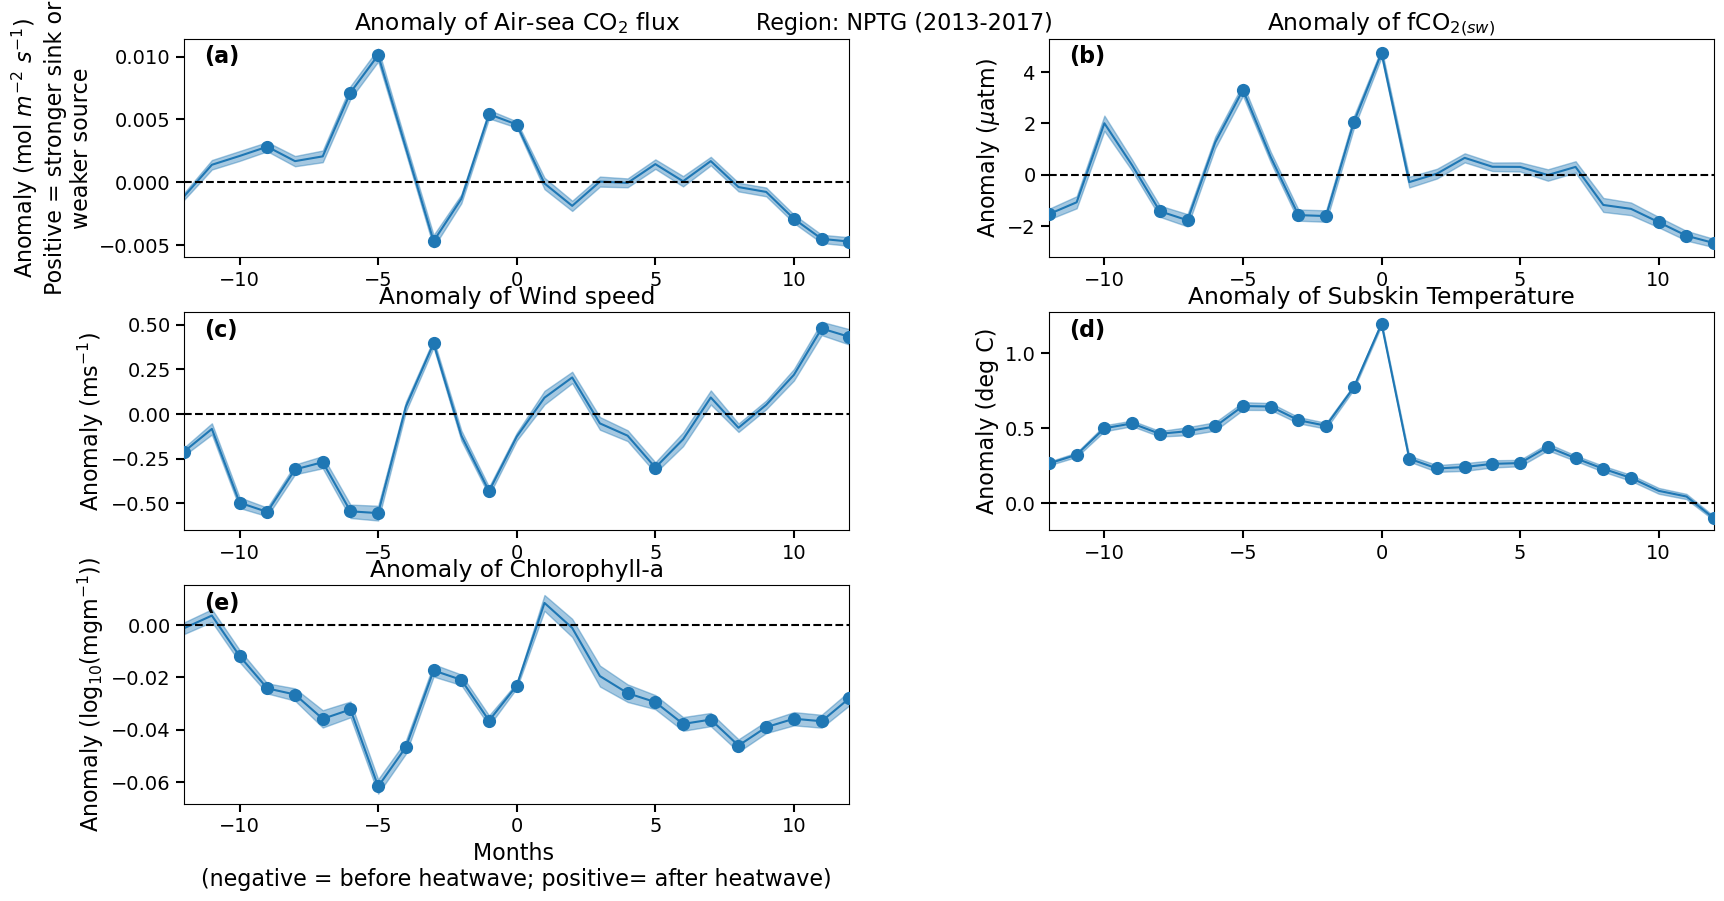

CCAL
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

PNEC
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

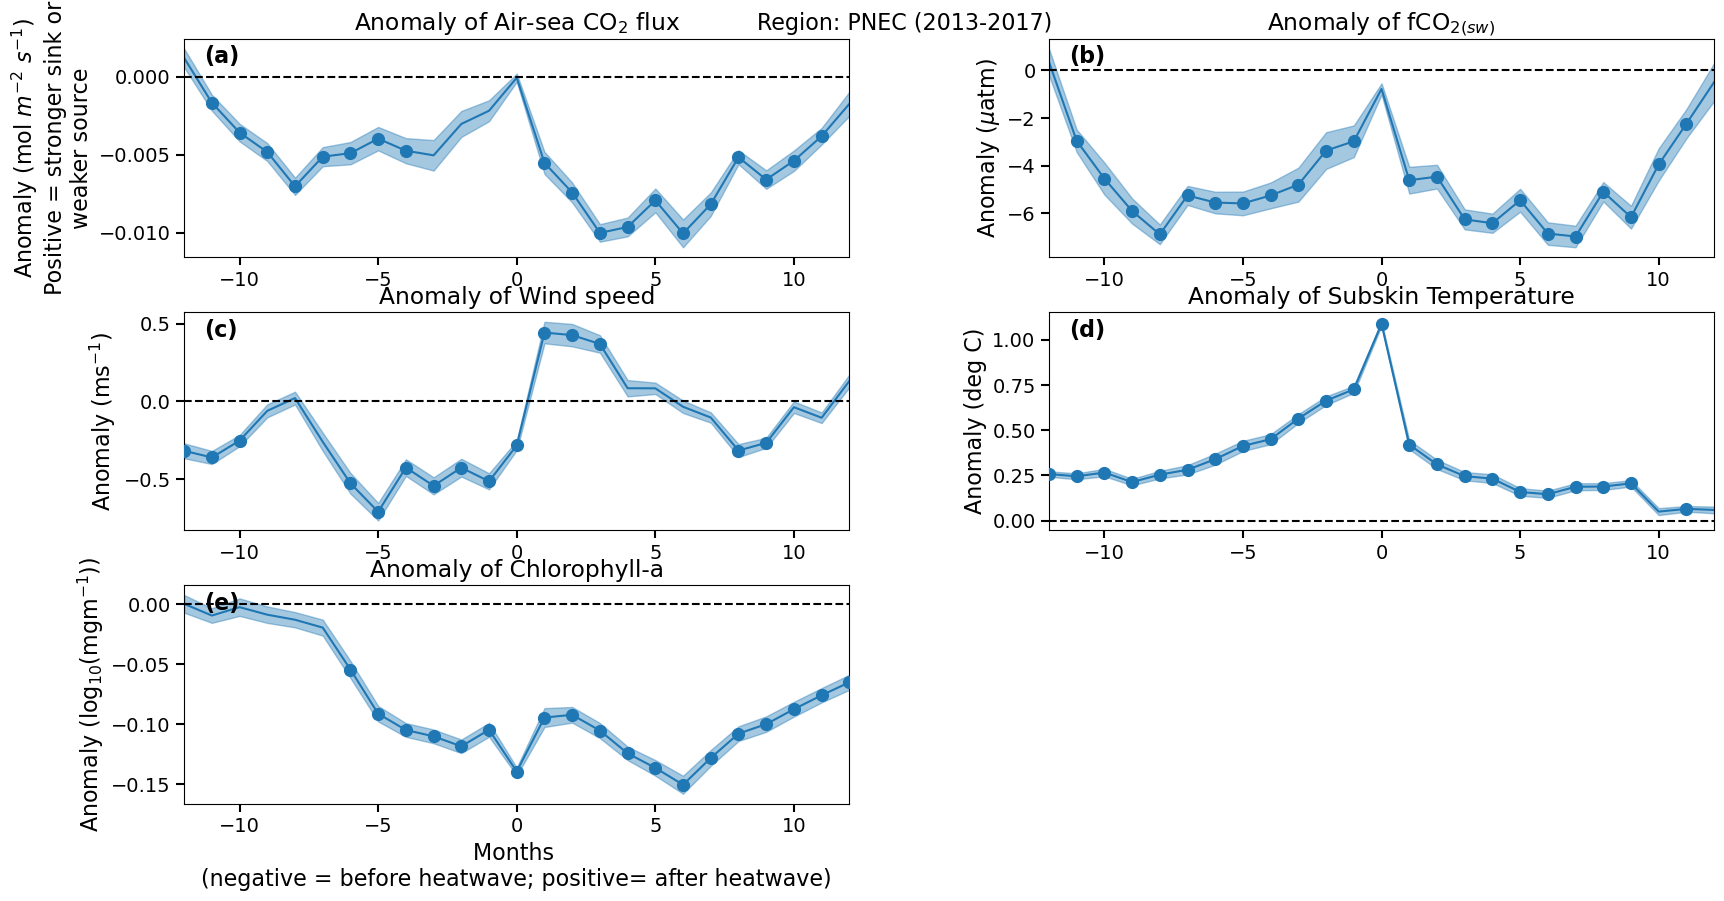

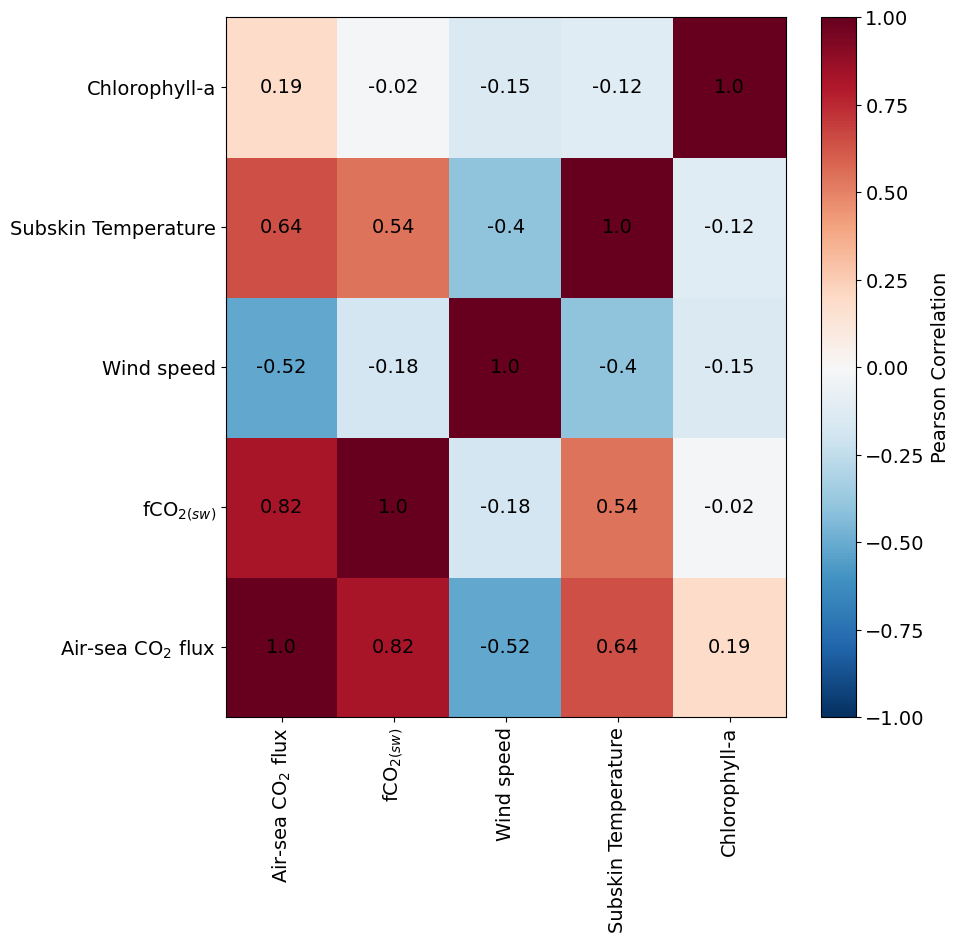

ARCT
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

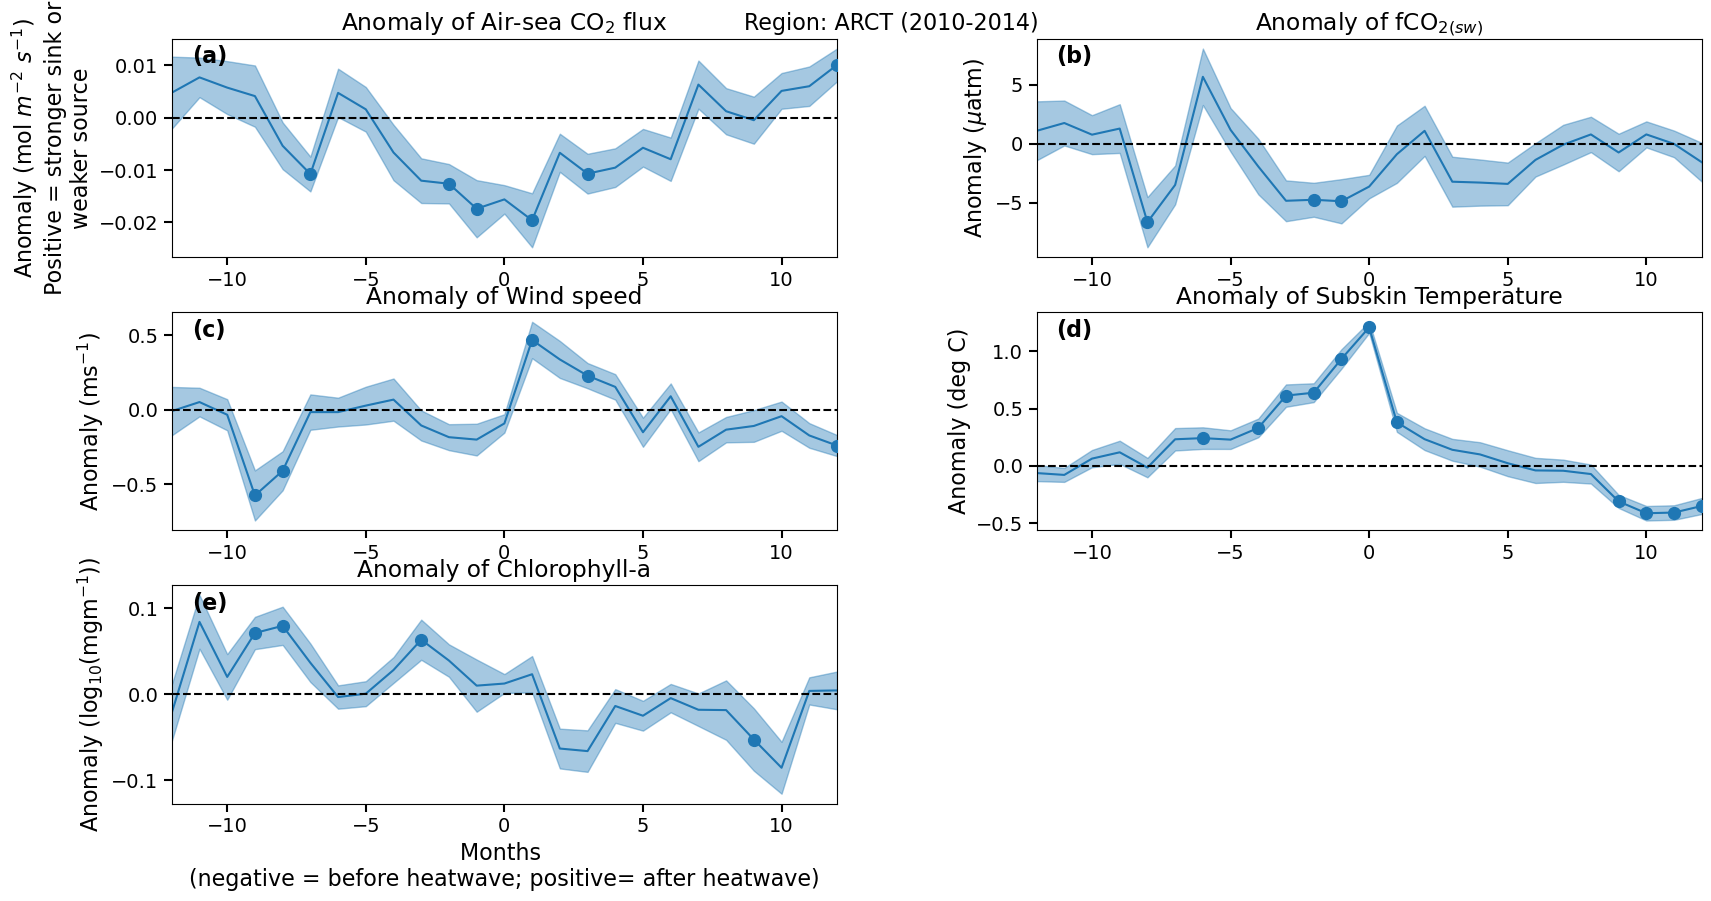

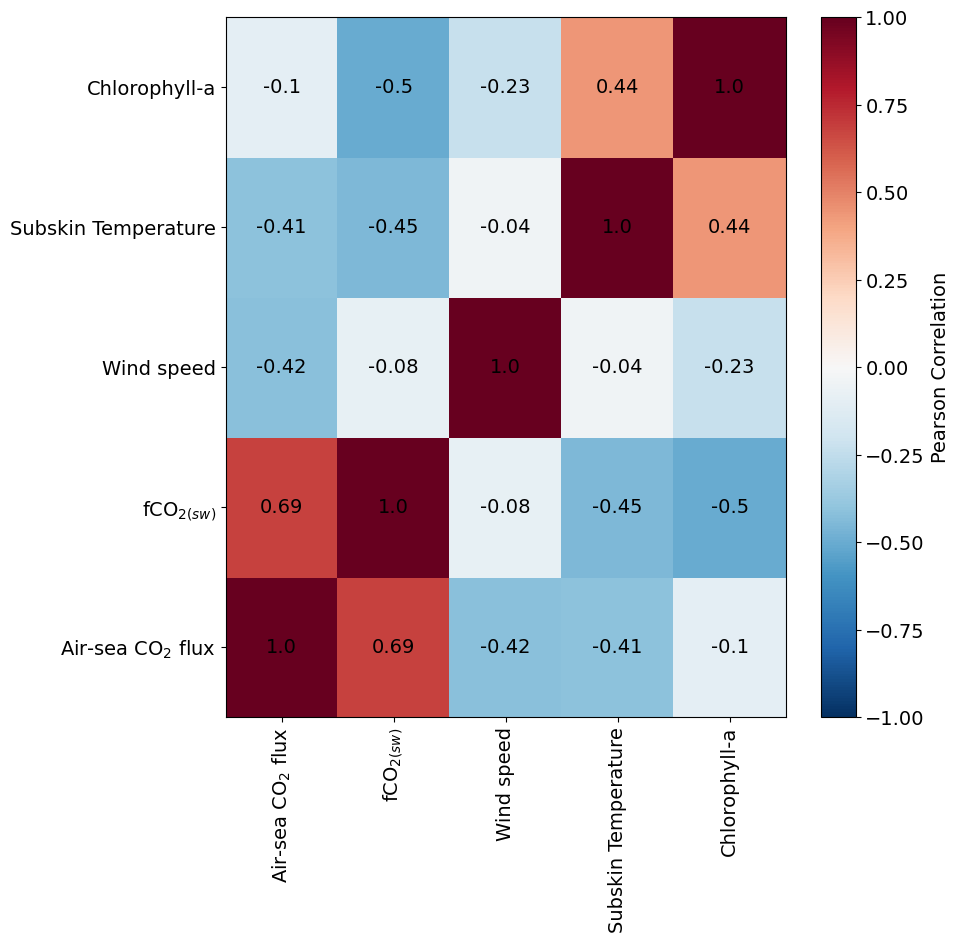

NWCS
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

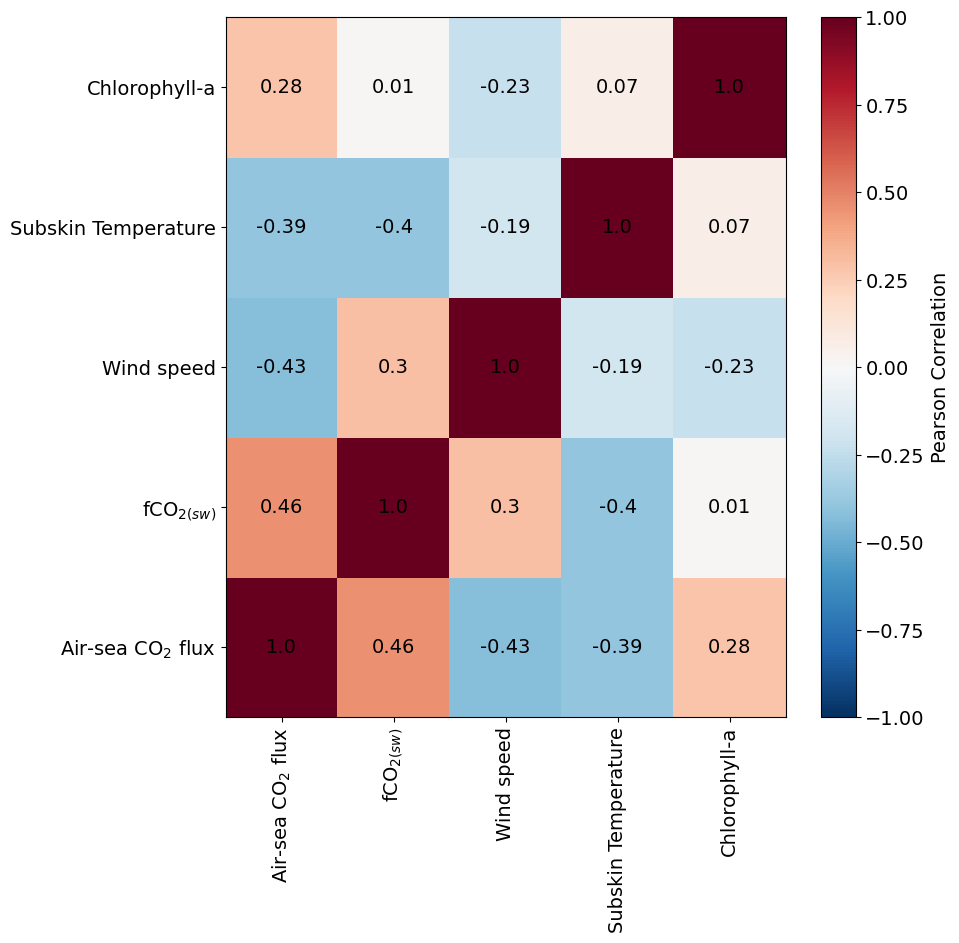

AUSW
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

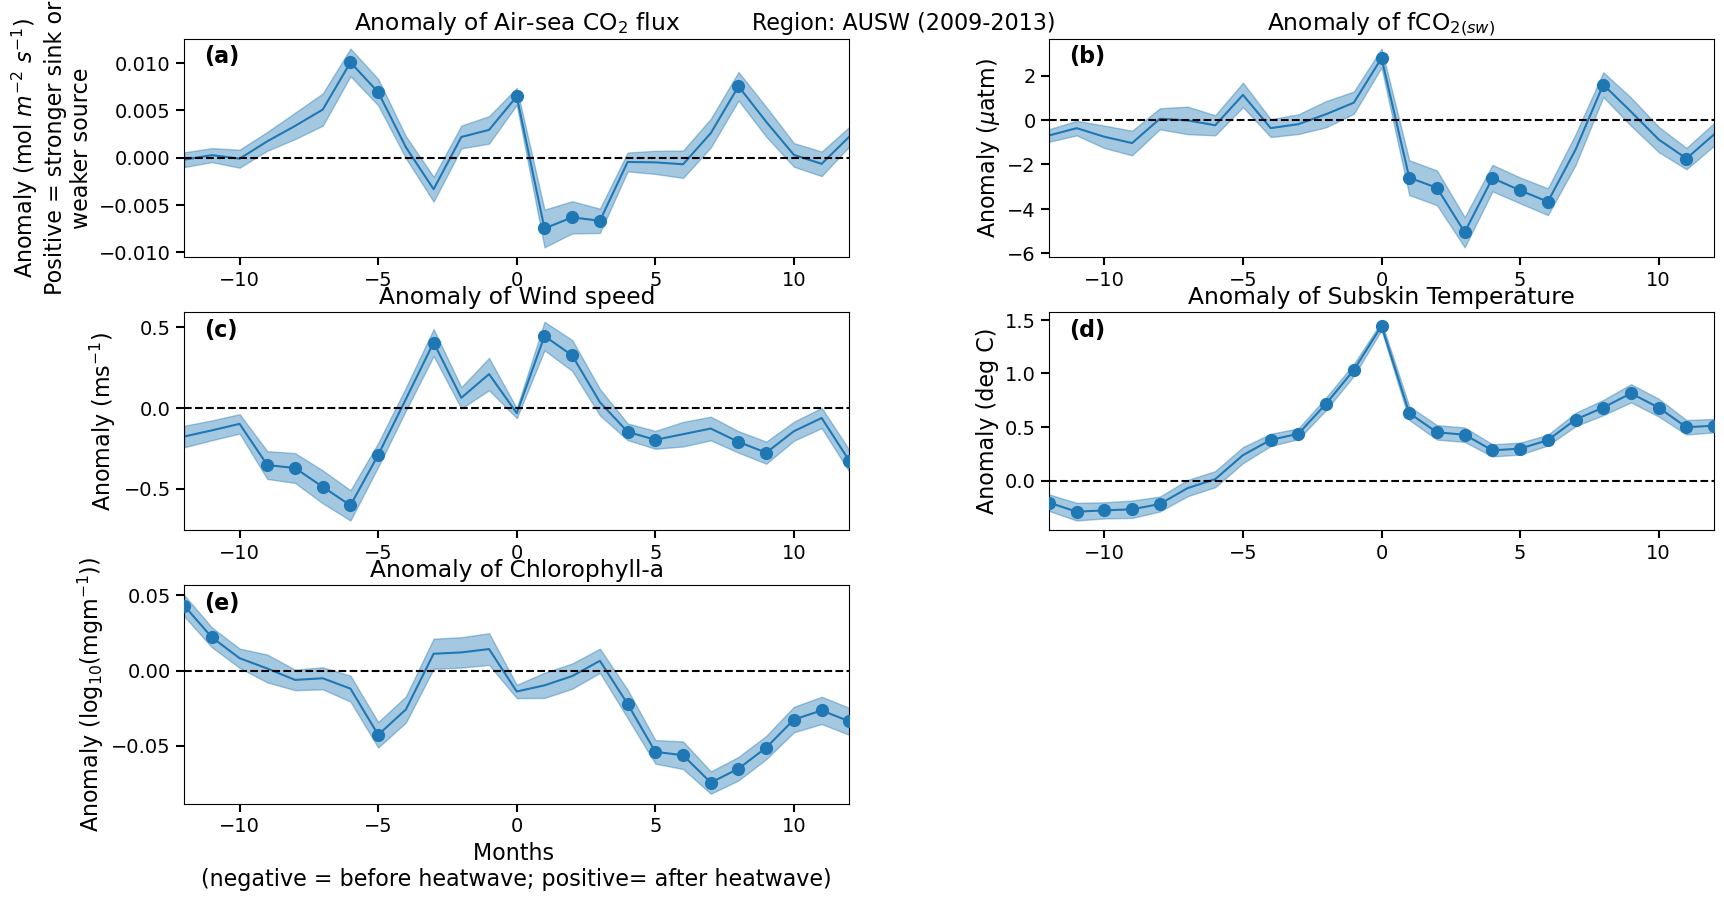

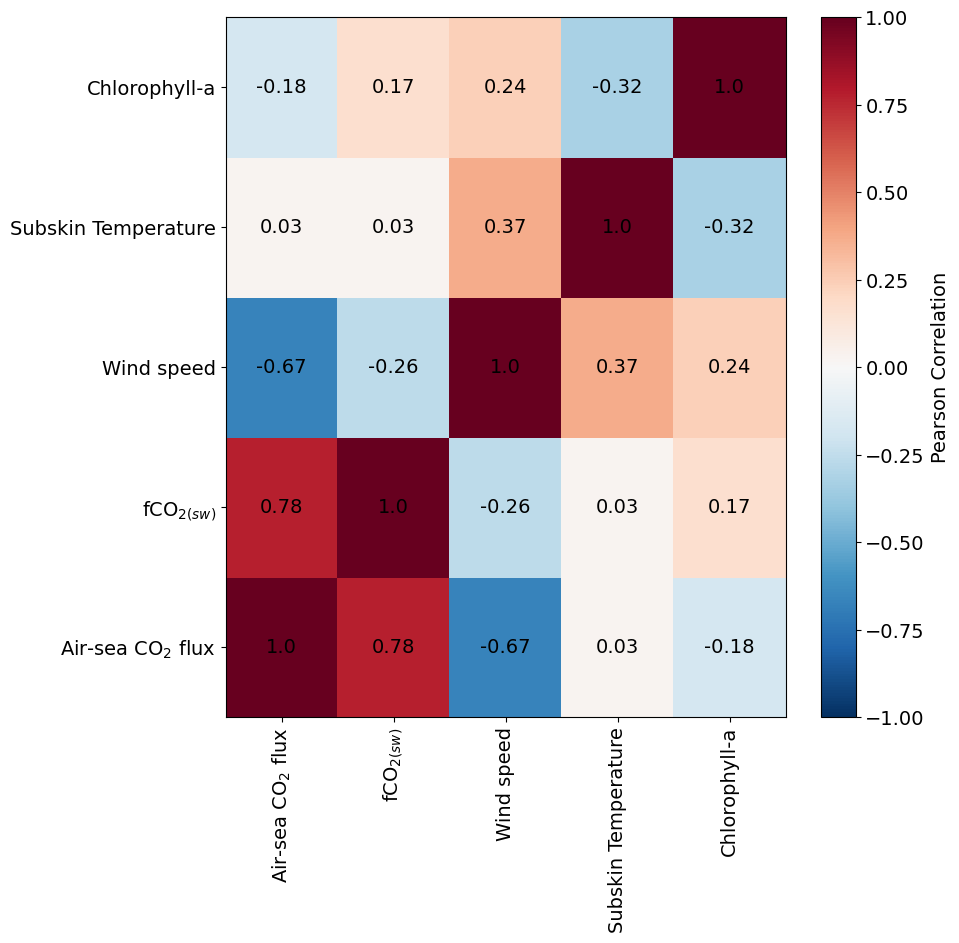

TASM
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

ANTA
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

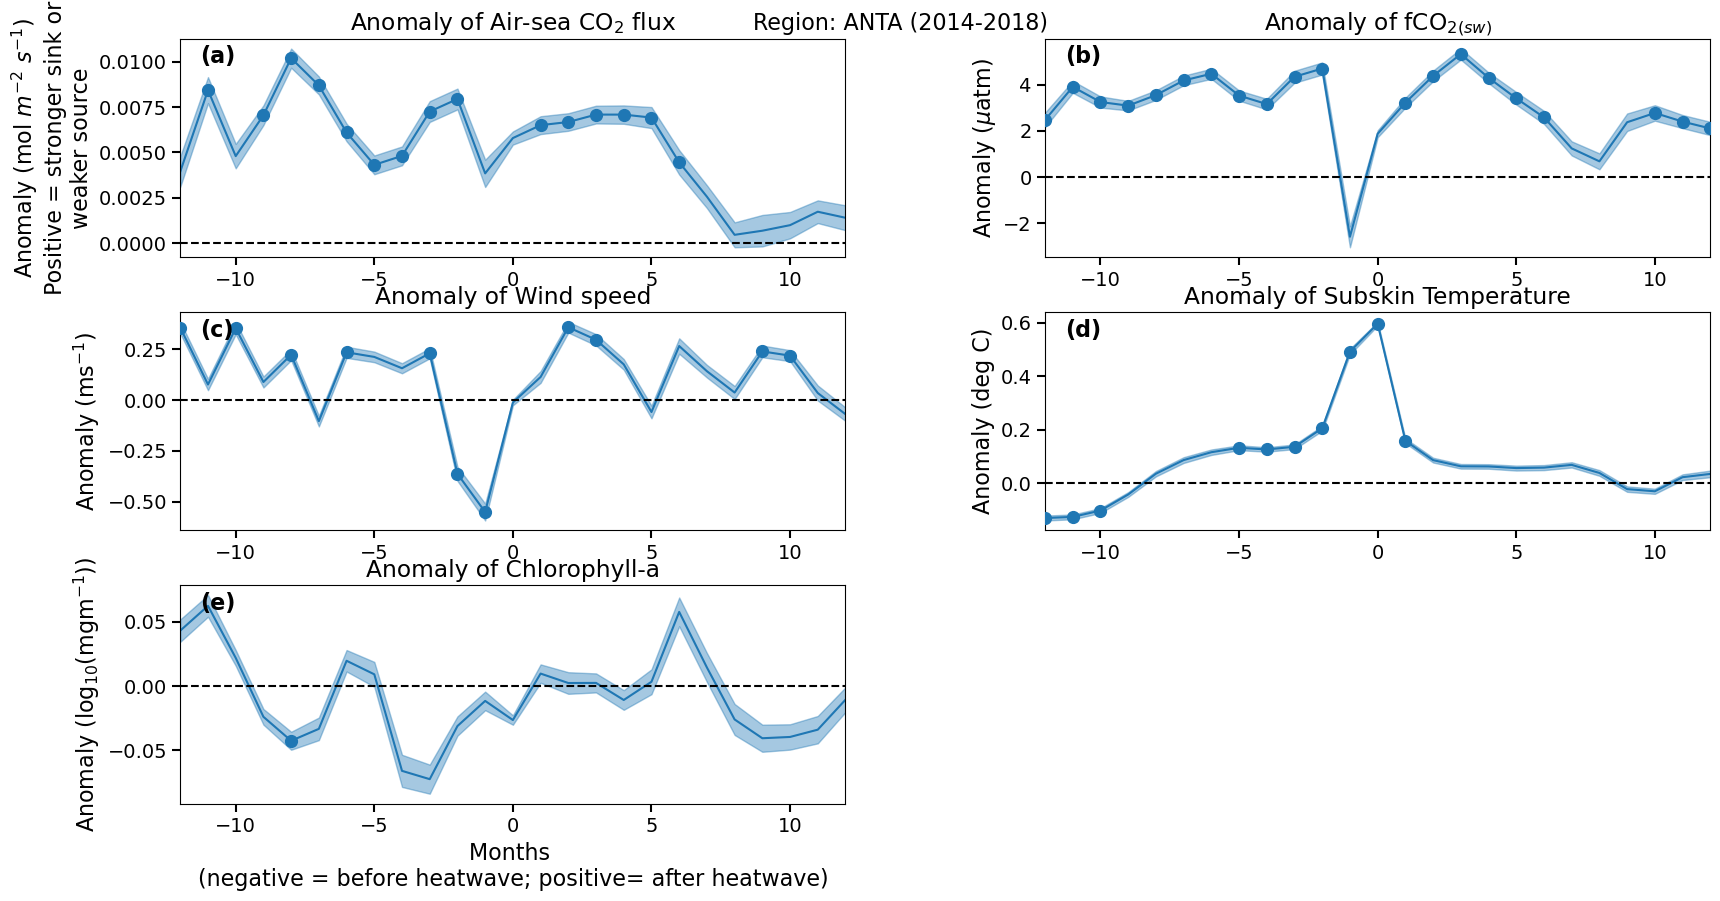

SPSG
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

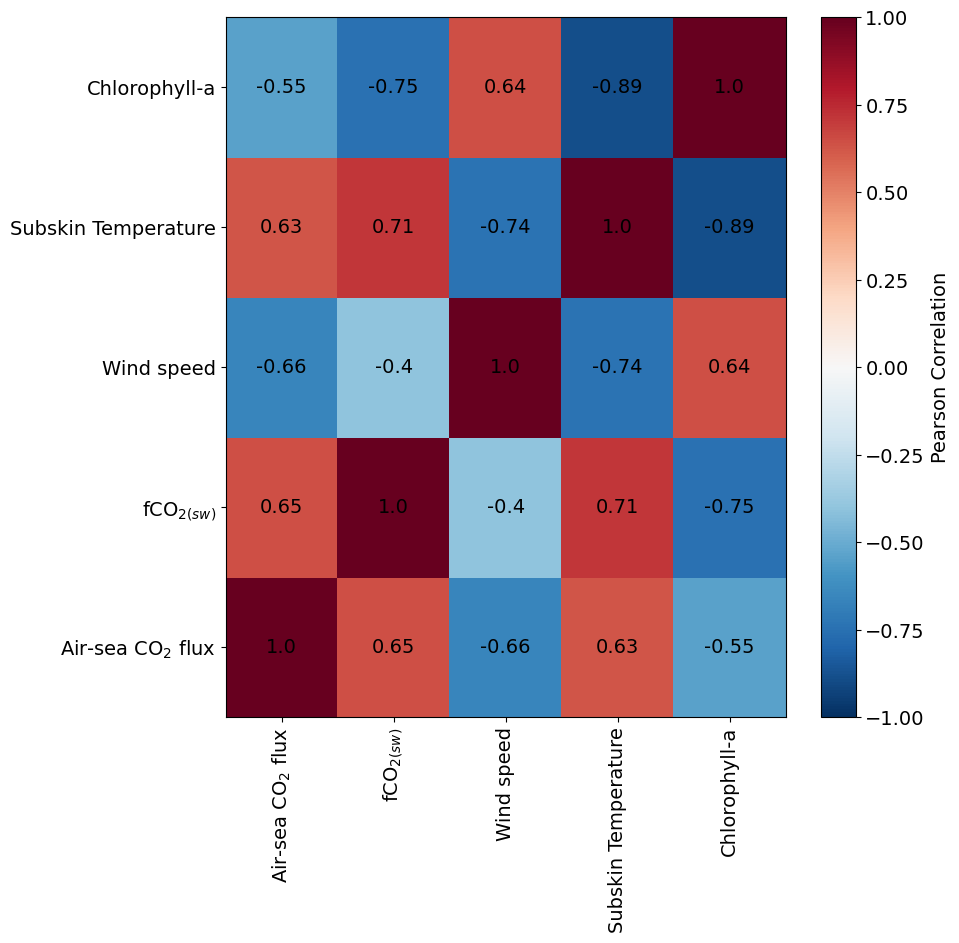

SATL
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

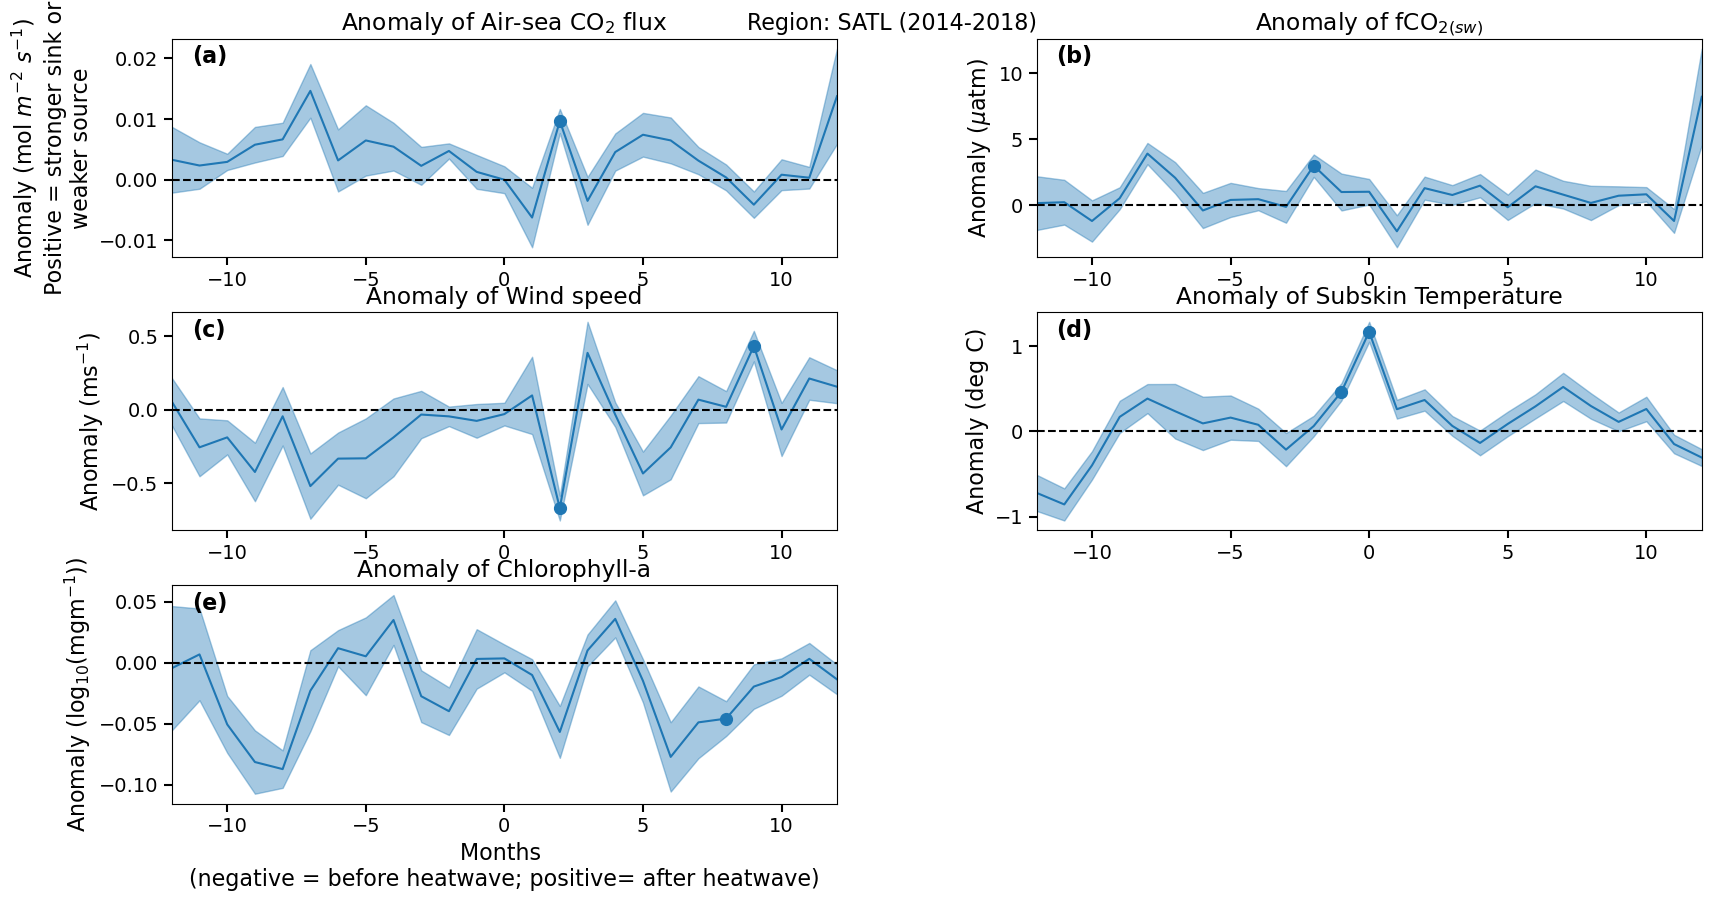

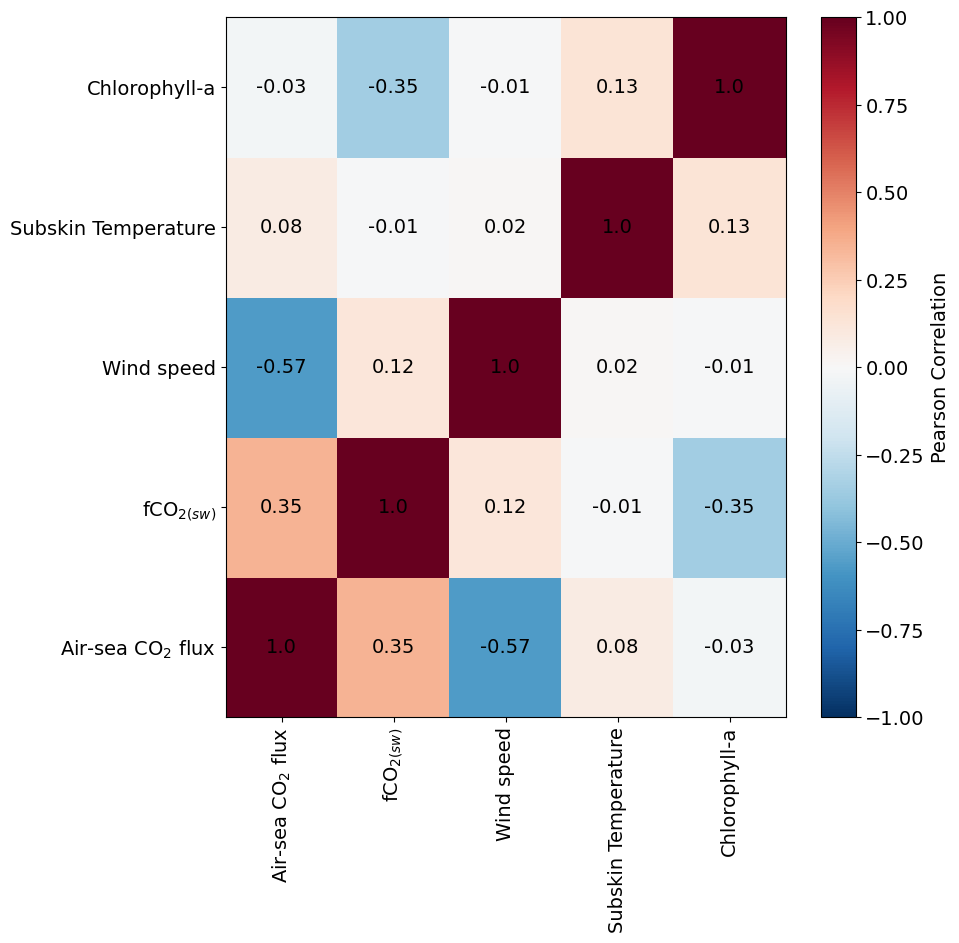

MONS
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

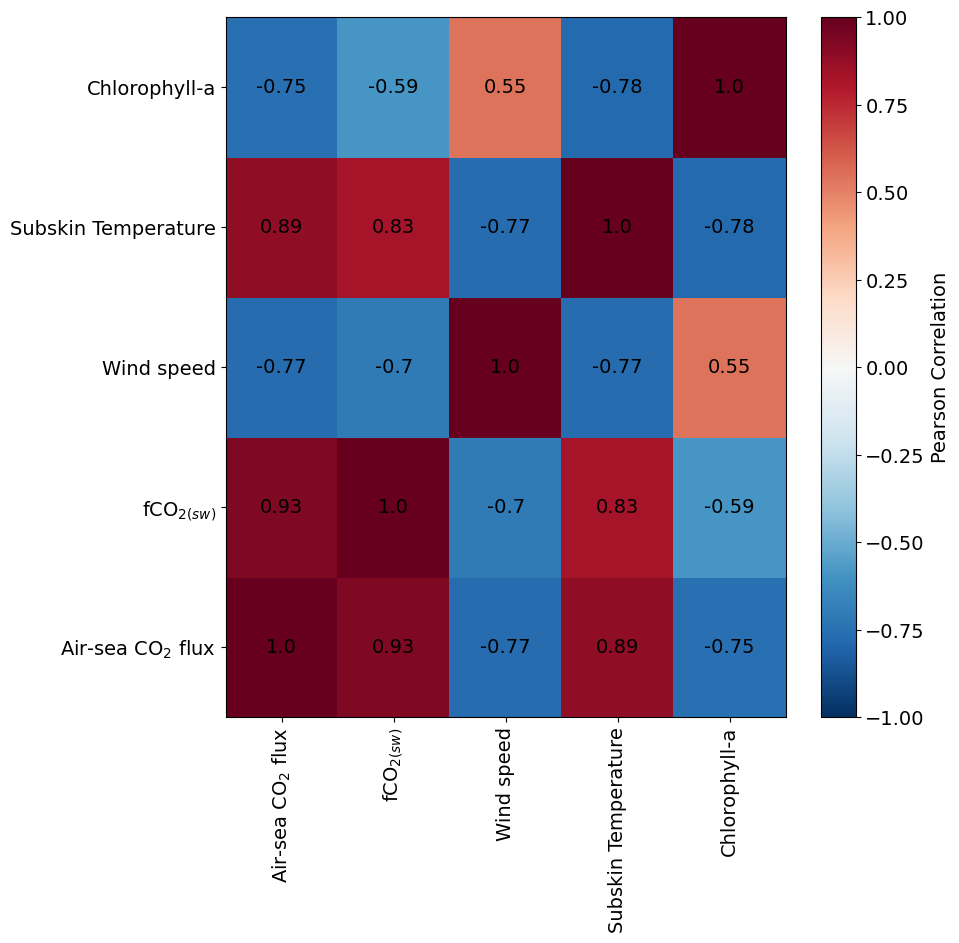

ISSG
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

MEDI
flux
fco2
ERA5_ws
subskin_temp
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\1638120505.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

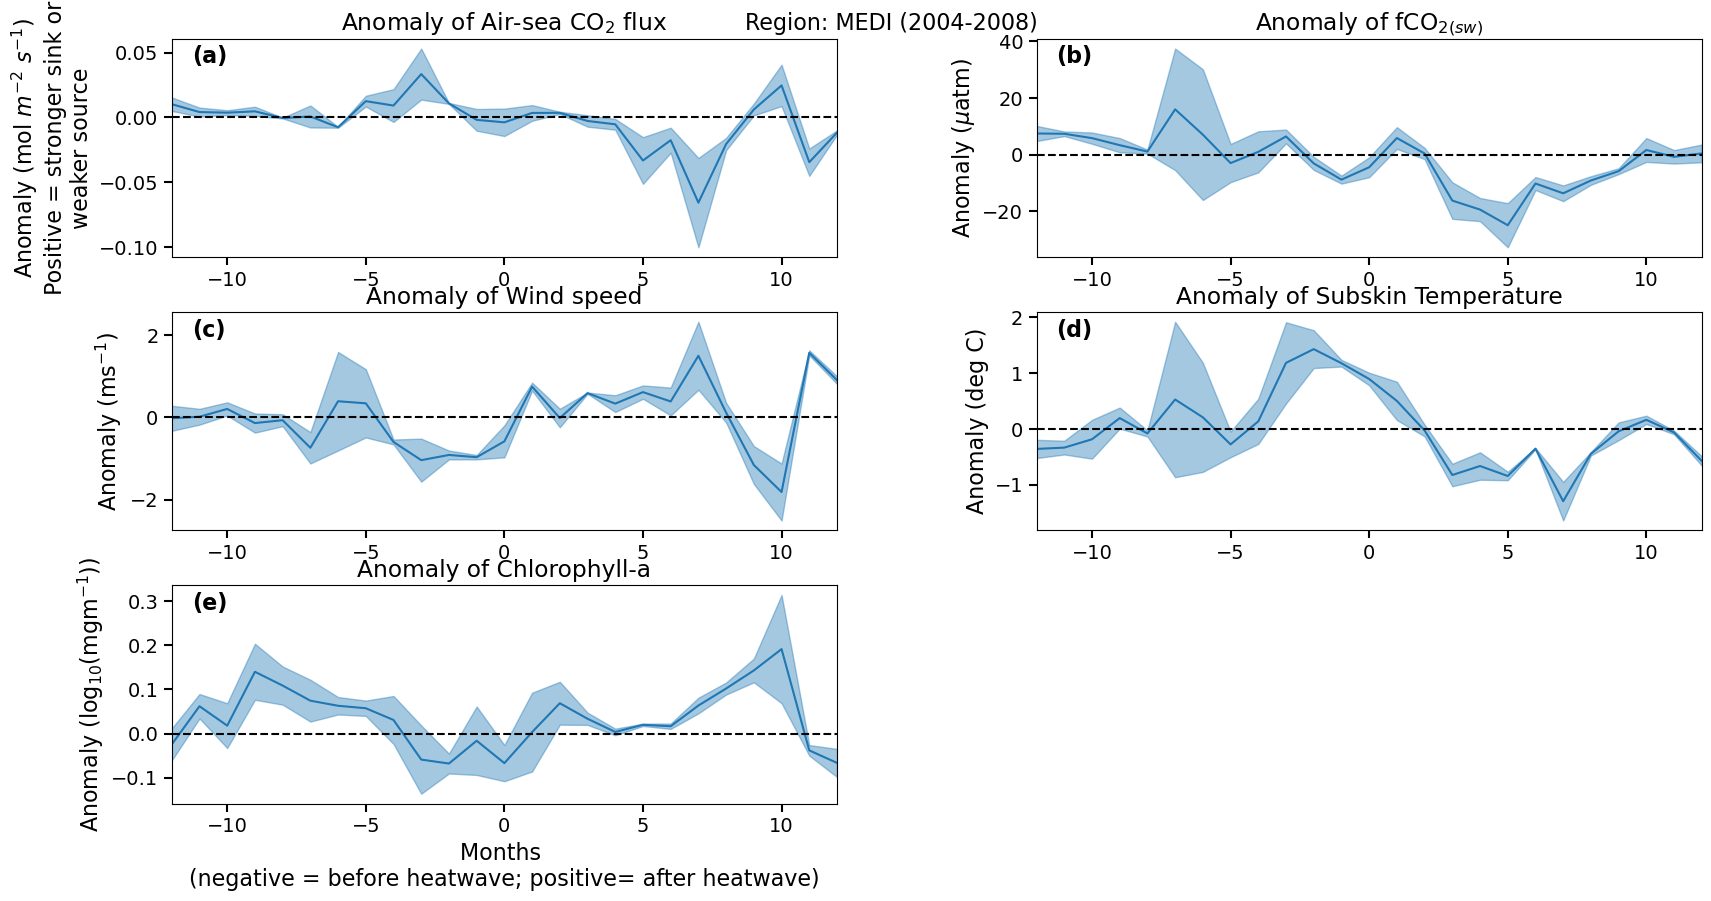

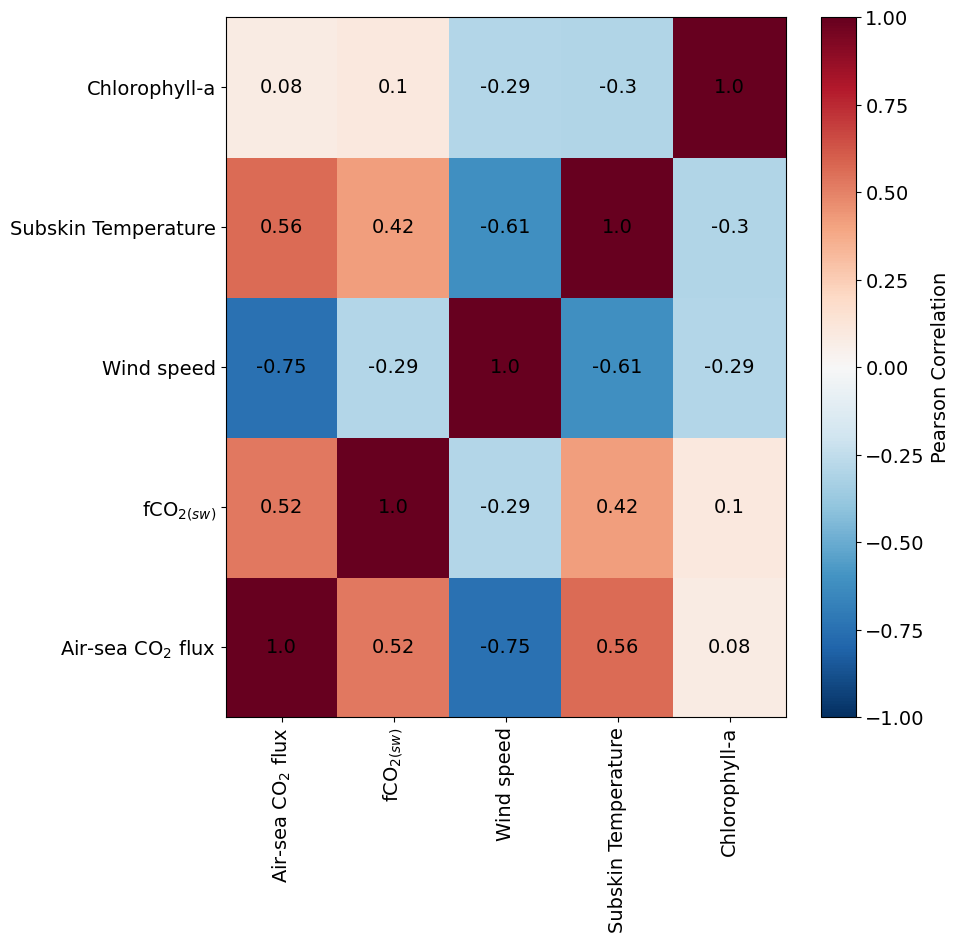

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.transforms
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
output_loc = 'E:/OceanHealth/output_gcb/'
data = pd.read_csv(output_loc+ f"results_cat_3_4_.csv")
variables = data['Parameter'].unique()
#variables = ['temperature','CCMP_ws','omega_ar','spco2','dic','fgco2','talk','ph_total','OCCCI_chl']
#['fgco2', 'ph_total', 'omega_ar', 'temperature', 'spco2', 'talk','CCMP_ws','OCCCI_chl','dic']
naming = {
    'flux': ['Air-sea CO$_2$ flux','mol $m^{-2}$ $s^{-1}$','\n Positive = stronger sink or \nweaker source'],
    'pH': ['pH Total','-log([H+]',''],
    'saturation_aragonite': ['Argonite Saturation','dimensionless',''],
    'subskin_temp': ['Subskin Temperature','deg C',''],
    'skin_temp': ['Skin Temperature','deg C',''],
    'fco2': ['fCO$_{2 (sw)}$','$\mu$atm',''],
    'ta': ['TA','$\mu$mol kg$^{-1}$',''],
    'ERA5_ws': ['Wind speed','ms$^{-1}$',''],
    'CCMP_ws': ['CCMP Wind speed','ms$^{-1}$',''],
    'OC-CCI_chlor_a': ['Chlorophyll-a','log$_{10}$(mgm$^{-1}$)',''],
    'dic': ['DIC','$\mu$mol kg$^{-1}$',''],
    'MEI': ['MEI','dimensionless','']
}
let = ['a','b','c','d','e','f','g','h','i']
fontsize = 16
# Iterate over regions and create separate plots for each
for region in data['Region Name'].unique():
    print(region)
    region_data = data[data['Region Name'] == region]
    start_year = region_data['Start Year'].min()
    end_year = region_data['End Year'].max()
    combined_cat_values = region_data['combined_cat_values']

    fig, axs = plt.subplots(int(np.ceil(len(variables)/2)), 2, figsize=(18, 1.8 * len(variables)), sharex=False)
    fig.suptitle(f'Region: {region} ({start_year}-{end_year})',  fontsize=fontsize, ha='center')  # Place region name and year on top of the plots with increased font size
    axs = axs.ravel()
    data_corr = pd.DataFrame()
    for i, variable in enumerate(variables):
        print(variable)
        # Filter data for the specific variable and region
        variable_data = region_data[region_data['Parameter'] == variable]
        #print(variable_data)
        
        # Sort the data by Months After for a better visualization
        variable_data.sort_values(by='months_after', inplace=True)
        f = np.where(np.array(variable_data['Stat from heatwave']) < 0.05)[0]
        g = np.where(np.array(variable_data['Wilcoxon']) < 0.05)[0]
        #ax2 = axs[i].twinx()
        #ax2.plot(variable_data['months_after'],variable_data['Number of pixels'],'r',zorder=0,alpha=0.5)
        #ax2.set_ylabel('Number of pixels',fontsize=fontsize)
        axs[i] .plot(variable_data['months_after'],variable_data['Mean anomaly'],zorder=2,color = 'tab:blue')
        axs[i].fill_between(variable_data['months_after'],np.array(variable_data['Mean anomaly'])-(np.array(variable_data['Anomaly standard error'])/np.array(np.sqrt(variable_data["Number of pixels"]))),np.array(variable_data['Mean anomaly'])+(np.array(variable_data['Anomaly standard error'])/np.array(np.sqrt(variable_data["Number of pixels"]))),alpha=0.4,zorder=2,color='tab:blue')
        axs[i].plot(variable_data['months_after'],np.zeros((len(variable_data['months_after']))),'k',linestyle='--',zorder=2)
        #axs[i].scatter(np.array(variable_data['months_after'])[f],np.array(variable_data['Median anomaly'])[f],s=24,zorder=4,c='#117733')
        axs[i].scatter(np.array(variable_data['months_after'])[g],np.array(variable_data['Mean anomaly'])[g],s=72,zorder=3,c='tab:blue')
        axs[i].tick_params(axis='both', which='major', width=1.5, length=6)  # Adjust tick parameters
        axs[i].set_title(f'Anomaly of {naming[variable][0]}')
        axs[i].set_ylabel('Anomaly ('+naming[variable][1]+')'+naming[variable][2],fontsize=fontsize)
        #ax2.set_zorder(0)
        axs[i].text(0.03,0.97,f'({let[i]})',transform=axs[i].transAxes,va='top',fontweight='bold',fontsize = fontsize)
        axs[i].set_xlim([np.min(variable_data['months_after']),np.max(variable_data['months_after'])])
        axs[i].set_zorder(2)
        axs[i].patch.set_visible(False)
        #print(variable_data['Median anomaly'])
        data_corr[naming[variable][0]] = variable_data['Median anomaly'].values
        #print(data)
    
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=.3, hspace=.25)
    if (len(variables) % 2) != 0:
        axs[-1].remove()
        axs[-2].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)  # Adjust xlabel fontsize
        axs[-1].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)
    else:
        axs[-1].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)  # Adjust xlabel fontsize
        axs[-2].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)
    filename = output_loc+ f'plots/{region}_{start_year}-{end_year}_cat_3_4_plots.png'
    fig.savefig(filename)
    plt.show()

    fig, axs = plt.subplots(1,1,figsize=(10,10))
    plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=0.95)
    corr = np.corrcoef(np.transpose(np.array(data_corr)))
    #corr.style.background_gradient(cmap='coolwarm')
    a2 = plt.pcolor(corr,vmin=-1,vmax=1,cmap='RdBu_r')
    l = np.arange(0.5,corr.shape[0],1)
    plt.xticks(l,labels=list(data_corr))
    plt.xticks(rotation=90)
    plt.yticks(l,labels=list(data_corr))
    for i in range(len(l)):
        for j in range(len(l)):
            plt.text(l[i],l[j],str(np.round(corr[i,j],2)),horizontalalignment='center',verticalalignment='center')
    cbar = plt.colorbar(a2)
    cbar.ax.set_ylabel( 'Pearson Correlation')
    plt.show()
    fig.savefig(output_loc+ f'plots/{region}_{start_year}-{end_year}_cat_3_4_plots_corr.png')
        

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:20: SyntaxWarning: invalid escape sequence '\m'
  'fco2': ['fCO$_{2 (sw)}$','$\mu$atm',''],
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:21: SyntaxWarning: invalid escape sequence '\m'
  'ta': ['TA','$\mu$mol kg$^{-1}$',''],
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:25: SyntaxWarning: invalid escape sequence '\m'
  'dic': ['DIC','$\mu$mol kg$^{-1}$',''],


[['CCAL', 'PNEC', 'NPTG'], ['CCAL - California Upwelling Coastal', 'PNEC - Pacific Equatorial Counter current', 'NPTG - North Pacific Tropical Gyre']]
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a


C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data.sort_values(by='months_after', inplace=True)
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variable_data['Mean anomaly'] = -variable_data['Mean anomaly']/12.011 / (3600*24) # Negative here to switch flux direction so consistent to OceanSODA
C:\Users\df391\AppData\Local\Temp\ipykernel_10892\2406555934.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy o

[['ANTA', 'AUSW', 'SPSG'], ['ANTA - Antarctic', 'AUSW - Austrialia-Indonesian Coastal', 'SPSG - South Pacific Subtropical Gyre']]
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a
subskin_temp
ERA5_ws
fco2
flux
OC-CCI_chlor_a


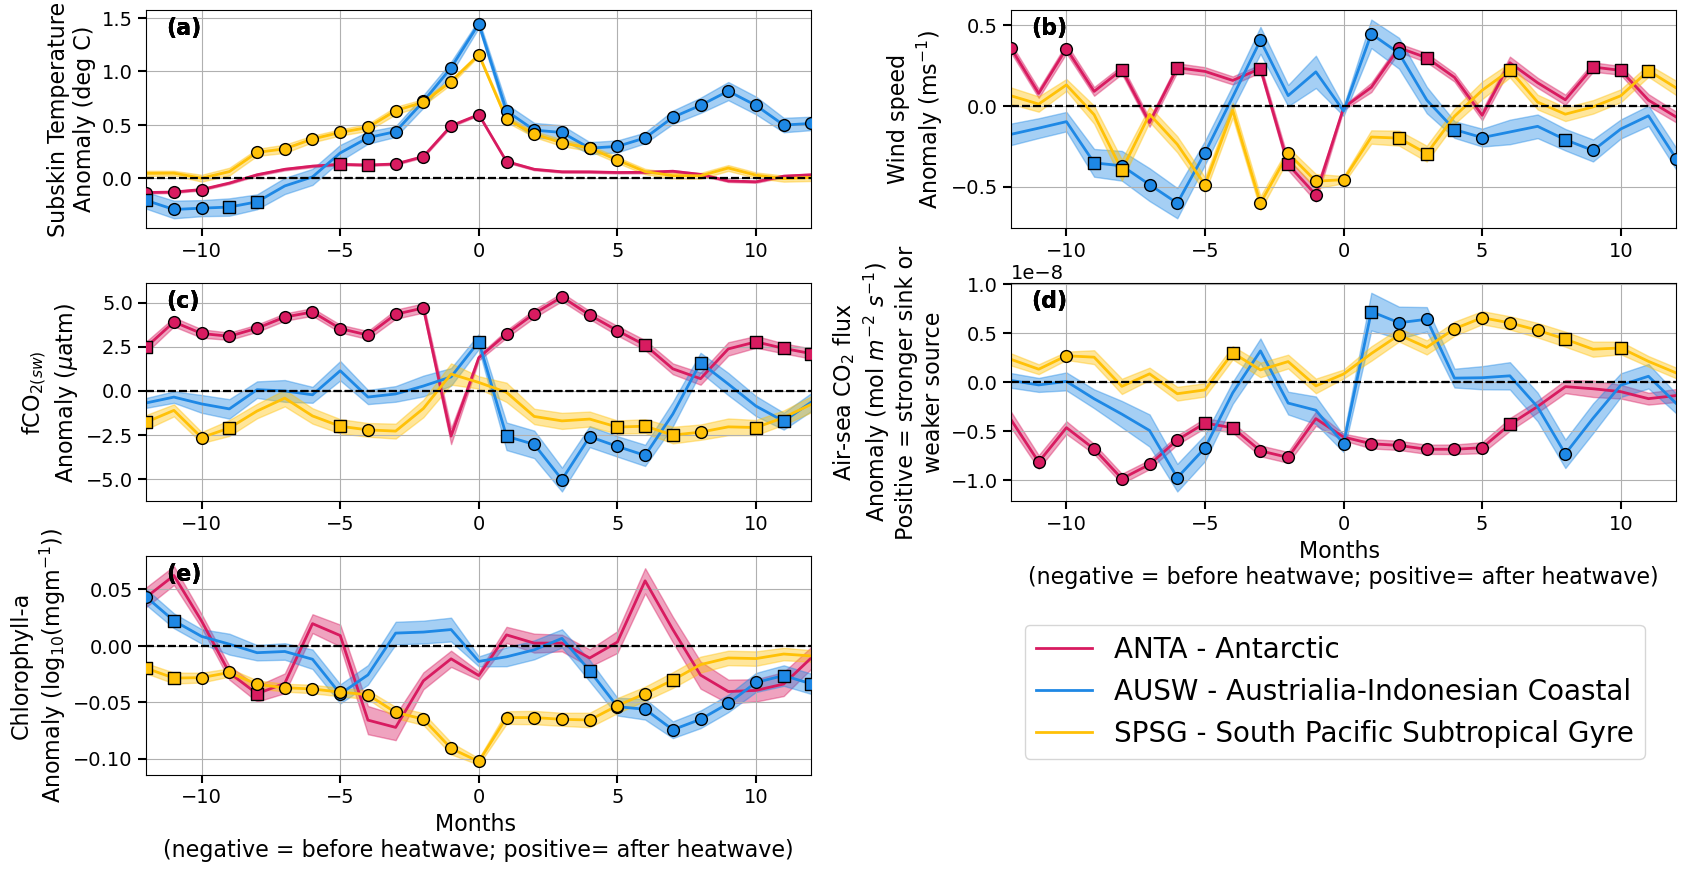

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.transforms
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
output_loc = 'E:/OceanHealth/output_gcb/'
data = pd.read_csv(output_loc+ f"results_cat_3_4_.csv")
variables = data['Parameter'].unique()
variables=['subskin_temp','ERA5_ws','fco2','flux','OC-CCI_chlor_a']
# variables = ['subskin_temp','ERA5_ws','saturation_aragonite','fco2','dic','flux','ta','pH','OC-CCI_chlor_a']
#['fgco2', 'ph_total', 'omega_ar', 'temperature', 'spco2', 'talk','CCMP_ws','OCCCI_chl','dic']
naming = {
    'flux': ['Air-sea CO$_2$ flux','mol $m^{-2}$ $s^{-1}$','\n Positive = stronger sink or \nweaker source'],
    'pH': ['pH Total','-log([H+]',''],
    'saturation_aragonite': ['Argonite Saturation','dimensionless',''],
    'subskin_temp': ['Subskin Temperature','deg C',''],
    'skin_temp': ['Skin Temperature','deg C',''],
    'fco2': ['fCO$_{2 (sw)}$','$\mu$atm',''],
    'ta': ['TA','$\mu$mol kg$^{-1}$',''],
    'ERA5_ws': ['Wind speed','ms$^{-1}$',''],
    'CCMP_ws': ['CCMP Wind speed','ms$^{-1}$',''],
    'OC-CCI_chlor_a': ['Chlorophyll-a','log$_{10}$(mgm$^{-1}$)',''],
    'dic': ['DIC','$\mu$mol kg$^{-1}$',''],
    'MEI': ['MEI','dimensionless','']
}
let = ['a','b','c','d','e','f','g','h','i']
fontsize = 16
region_combine = [[['CCAL','PNEC','NPTG'],['CCAL - California Upwelling Coastal','PNEC - Pacific Equatorial Counter current','NPTG - North Pacific Tropical Gyre']],
                  [['ANTA','AUSW','SPSG'],['ANTA - Antarctic','AUSW - Austrialia-Indonesian Coastal','SPSG - South Pacific Subtropical Gyre']]]
cols = ['#D81B60','#1E88E5','#FFC107', '#004D40','#44AA99','#332288','#999933','#DDCC77',]
for regions in region_combine:
    print(regions)
    
    fig, axs = plt.subplots(int(np.ceil(len(variables)/2)), 2, figsize=(18, 1.8 * len(variables)), sharex=False)
    #fig.suptitle(f'Region: {regions} ({start_year}-{end_year})',  fontsize=16, ha='center')  # Place region name and year on top of the plots with increased font size
    axs = axs.ravel()
    j=0
    for region in regions[0]:   
        region_data = data[data['Region Name'] == region]
        start_year = region_data['Start Year'].min()
        end_year = region_data['End Year'].max()
        combined_cat_values = region_data['combined_cat_values']
        for i, variable in enumerate(variables):
            print(variable)
            if variable != '':
                # Filter data for the specific variable and region
                variable_data = region_data[region_data['Parameter'] == variable]
                #print(variable_data)
        
                # Sort the data by Months After for a better visualization
                variable_data.sort_values(by='months_after', inplace=True)
                #ax2 = axs[i].twinx()
                # ax2.plot(variable_data['months_after'],variable_data['Number of pixels'],'r',zorder=0,alpha=0.5)
                # ax2.set_ylabel('Number of pixels',fontsize=fontsize)
                f = np.where(np.array(variable_data['Stat from heatwave']) < 0.05)[0]
                g = np.where((np.array(variable_data['Wilcoxon']) < 0.01))[0]
                g2 = np.where((np.array(variable_data['Wilcoxon']) > 0.01) & (np.array(variable_data['Wilcoxon']) < 0.05))[0]
                #ax2 = axs[i].twinx()
                #ax2.plot(variable_data['months_after'],variable_data['Number of pixels'],'r',zorder=0,alpha=0.5)
                #ax2.set_ylabel('Number of pixels',fontsize=fontsize)
                if variable == 'flux': # Converting from g C m-2 d-1 to mol m-2 s-1
                    variable_data['Mean anomaly'] = -variable_data['Mean anomaly']/12.011 / (3600*24) # Negative here to switch flux direction so consistent to OceanSODA
                    variable_data['Anomaly standard error'] = variable_data['Anomaly standard error']/12.011 / (3600*24)
                axs[i] .plot(variable_data['months_after'],variable_data['Mean anomaly'],zorder=2,color = cols[j],label=regions[1][j],linewidth=2)
                axs[i].fill_between(variable_data['months_after'],np.array(variable_data['Mean anomaly'])-(np.array(variable_data['Anomaly standard error'])/np.array(np.sqrt(variable_data["Number of pixels"]))),np.array(variable_data['Mean anomaly'])+(np.array(variable_data['Anomaly standard error'])/np.array(np.sqrt(variable_data["Number of pixels"]))),alpha=0.4,zorder=1,color = cols[j])
                axs[i].plot(variable_data['months_after'],np.zeros((len(variable_data['months_after']))),'k',linestyle='--',zorder=2)
                #axs[i].scatter(np.array(variable_data['months_after'])[f],np.array(variable_data['Median anomaly'])[f],s=24,zorder=4,c='#117733')
                axs[i].scatter(np.array(variable_data['months_after'])[g],np.array(variable_data['Mean anomaly'])[g],s=72,zorder=3,color = cols[j],edgecolor='k')
                axs[i].scatter(np.array(variable_data['months_after'])[g2],np.array(variable_data['Mean anomaly'])[g2],s=72,zorder=3,color = cols[j],marker='s',edgecolor='k')
            
                axs[i].tick_params(axis='both', which='major', width=1.5, length=6)  # Adjust tick parameters
                #axs[i].set_title(f'Anomaly of {naming[variable][0]}')
                axs[i].set_ylabel(naming[variable][0]+'\nAnomaly ('+naming[variable][1]+')'+naming[variable][2],fontsize=fontsize)
                #ax2.set_zorder(0)
                axs[i].set_zorder(2)
                axs[i].patch.set_visible(False)
                axs[i].text(0.03,0.97,f'({let[i]})',transform=axs[i].transAxes,va='top',fontweight='bold',fontsize = fontsize)
                axs[i].set_xlim([np.min(variable_data['months_after']),np.max(variable_data['months_after'])])
                axs[i].grid()
                #print(variable_data['Median anomaly'])
                #print(data)
        j=j+1
    # for i in range(len(variables)):
    #     axs[i].legend()
    axs[-2].legend(bbox_to_anchor=(1.3,0.75),loc='best',fontsize=20)
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.95, wspace=.3, hspace=.25)
    if (len(variables) % 2) != 0:
        axs[-1].remove()
        axs[-2].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)  # Adjust xlabel fontsize
        axs[-3].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)
    else:
        axs[-1].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)  # Adjust xlabel fontsize
        axs[-2].set_xlabel('Months \n(negative = before heatwave; positive= after heatwave)', fontsize=fontsize)
    filename = output_loc+ f'plots/{region}_{start_year}-{end_year}_cat_3_4_plots.png'
    fig.savefig(filename)
    plt.show()